In [1]:
import pandas as pd
import scipy
import pyreadstat
import pyshs
import matplotlib.pyplot as plt
import seaborn as sns
import prince
import numpy as np

C:\Users\rana_\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
pd.set_option('display.max_columns', None)

In [3]:
data_all = pd.read_excel(r"C:\Users\rana_\OneDrive\Bureau\inserm\travaux\Leem_2020_2021\transfer_6262507_files_792d0717\LEEM - 2021-2020\LEEM_2013_2014_2015\transfer_6497288_files_666cc856\LEEM 2013\LEEM 2013-2012\2013-2012-BDD.xlsx")

In [4]:
data_all

,COSI01,QSEXE,AGES,QAGER,UDA9,MKTSIZE,Q0,Q0B,Q0C,Q1L,Q2L,Q3L_0,Q3L_1,Q3L_2,Q3L_3,Q3L_4,Q3L_5,Q3L_6,Q3L_7,Q3L_8,Q3L_9,Q5L,Q6OL_0,Q6OL_1,Q6OL_2,Q6OL_3,Q6OL_4,Q6OL_5,Q6OL_6,Q6OL_7,Q6OL_8,Q6OL_9,Q6OL_10,Q6OL_11,Q6OL_12,Q6OL_13,Q6OL_14,Q6OL_15,Q6OL_16,Q6OL_17,Q6OL_18,Q6OL_19,Q7OL_0,Q7OL_1,Q7OL_2,Q7OL_3,Q7OL_4,Q7OL_5,Q7OL_6,Q7OL_7,Q7OL_8,Q7OL_9,Q7OL_10,Q7OL_11,Q7OL_12,Q7OL_13,Q7OL_14,Q7OL_15,Q7OL_16,Q7OL_17,Q7OL_18,Q7OL_19,Q7OL_20,Q7OL_21,Q7OL_22,Q7OL_23,Q7OL_24,Q7OL_25,Q8L,Q9L_0,Q9L_1,Q9L_2,Q9L_3,Q9L_4,Q9L_5,Q10L_0,Q10L_1,Q10L_2,Q11L_0,Q11L_1,Q11L_2,Q11L_3,Q11L_4,Q11L_5,Q11L_6,Q11L_7,Q11L_8,Q11L_9,Q11L_10,Q11L_11,Q11L_12,Q11L_13,Q11L_14,Q11L_15,Q82L,Q84L_0,Q84L_1,Q84L_2,Q84L_3,Q27L,Q28A,Q28B,Q28C,Q28D,Q28E,Q28BIS,Q32L_0,Q32L_1,Q32L_2,Q32L_3,Q32L_4,Q32L_5,Q32L_6,Q32L_7,Q32L_8,Q33L,Q35L_0,Q35L_1,Q35L_2,Q35L_3,Q35L_4,Q35L_5,Q35L_6,Q35L_7,Q35L_8,Q35L_9,Q35L_10,Q35L_11,Q35L_12,Q35L_13,Q87_0,Q87_1,Q87_2,Q87_3,Q87_4,Q87_5,Q87_6,Q87_7,Q87_8,Q103L,Q104,PSD
0,1,2,38,1,1,5,1,1,1,1,2,1,2,2,1,2,1,1,1,2,,2,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,1,2,1,3,2,1,3,5,5,2,3,,,,,,4,1,2,2,2,5,1,1,2,3,3,3,2,3,3,2,2,3,2,2,2,1,2,2,2,2,2,3,2,3,2,2,2,2,2,2,4,4,4,4,4,4,4,4,4,3,3,1.390720
1,1,1,43,2,7,3,1,1,1,4,4,3,2,2,1,2,2,2,1,1,,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,1,2,1,2,2,2,2,1,2,3,1,1,1,3,1,2,2,3,,,,,,4,1,1,1,1,5,3,1,1,3,1,1,2,3,3,2,3,4,5,5,2,1,2,2,1,1,1,1,1,5,1,1,1,1,2,2,1,2,2,4,2,3,2,1,2,2,2,1.384434
2,1,1,63,4,7,1,1,1,1,3,2,3,2,2,1,2,1,1,1,1,,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,2,5,5,3,2,4,3,1,3,2,1,2,2,1,5,2,2,2,,,,,,1,1,1,2,4,1,1,1,3,3,1,1,2,5,5,2,3,5,5,2,3,2,2,2,3,2,2,3,2,4,2,2,1,2,2,3,3,2,2,2,2,4,4,1,2,4,2,0.783311
3,1,2,60,4,1,5,1,1,1,5,5,2,1,1,2,1,2,2,1,1,,2,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,4,2,2,2,2,2,4,3,1,2,1,2,1,1,2,5,5,3,3,,,,,,4,2,3,3,1,5,3,3,3,3,1,1,5,5,3,5,3,4,5,5,5,3,1,3,3,5,3,3,5,4,5,3,1,3,3,3,4,2,2,2,1,4,2,2,2,6,3,0.874727
4,1,2,57,3,1,5,1,1,1,2,2,3,2,1,2,1,3,3,1,2,,2,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,2,2,2,2,2,1,2,3,1,2,1,1,1,1,2,5,5,3,2,,,,,,3,1,1,1,3,3,1,1,3,3,1,3,3,2,3,2,3,2,2,5,2,3,2,2,3,5,2,2,3,3,2,2,2,2,2,3,1,2,2,2,2,2,2,2,2,4,3,1.009711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2500,3,1,,,,,,,,1,1,1,1,2,1,2,2,1,1,1,1,2,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,2,1,2,2,2,2,1,,2,3,2,2,2,1,3,3,4,3,2,4,3,2,,,,,,,,2,1,1,2,1,1,,2,4,3,2,3,2,2,3,4,2,1,2,1,3,3,2,1,2,2,2,1,2,3,,,,,,,,,,,,,0.825692
2501,3,2,,,,,,,,2,2,1,1,2,1,1,2,1,1,1,1,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,3,,2,2,2,1,2,2,4,2,4,1,2,5,2,5,,,,,,,,2,1,1,2,3,1,,3,3,3,3,2,3,1,2,3,3,2,2,1,2,2,2,5,5,2,2,1,2,3,,,,,,,,,,,,,0.976133
2502,3,2,,,,,,,,1,1,1,1,2,1,2,2,1,2,2,2,2,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,1,2,,5,3,2,3,2,2,4,5,3,3,2,5,5,5,,,,,,,,2,3,1,3,1,3,,2,3,2,2,2,2,2,2,3,2,3,2,5,5,5,5,2,3,2,2,5,2,2,,,,,,,,,,,,,0.987772
2503,3,2,,,,,,,,1,2,2,1,2,1,1,2,1,1,1,2,2,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,2,2,2,2,2,2,2,,5,2,2,2,3,5,4,2,3,2,2,5,4,5,,,,,,,,2,1,1,1,1,3,,2,3,3,3,2,3,2,3,3,2,2,3,2,

In [5]:
data_all['COSI01'].value_counts()

COSI01
2    1002
3    1000
1     503
Name: count, dtype: int64

In [6]:
# données de 2013_Grand Public 
data = data_all.loc[data_all['COSI01'] == 2]

In [7]:
data

,COSI01,QSEXE,AGES,QAGER,UDA9,MKTSIZE,Q0,Q0B,Q0C,Q1L,Q2L,Q3L_0,Q3L_1,Q3L_2,Q3L_3,Q3L_4,Q3L_5,Q3L_6,Q3L_7,Q3L_8,Q3L_9,Q5L,Q6OL_0,Q6OL_1,Q6OL_2,Q6OL_3,Q6OL_4,Q6OL_5,Q6OL_6,Q6OL_7,Q6OL_8,Q6OL_9,Q6OL_10,Q6OL_11,Q6OL_12,Q6OL_13,Q6OL_14,Q6OL_15,Q6OL_16,Q6OL_17,Q6OL_18,Q6OL_19,Q7OL_0,Q7OL_1,Q7OL_2,Q7OL_3,Q7OL_4,Q7OL_5,Q7OL_6,Q7OL_7,Q7OL_8,Q7OL_9,Q7OL_10,Q7OL_11,Q7OL_12,Q7OL_13,Q7OL_14,Q7OL_15,Q7OL_16,Q7OL_17,Q7OL_18,Q7OL_19,Q7OL_20,Q7OL_21,Q7OL_22,Q7OL_23,Q7OL_24,Q7OL_25,Q8L,Q9L_0,Q9L_1,Q9L_2,Q9L_3,Q9L_4,Q9L_5,Q10L_0,Q10L_1,Q10L_2,Q11L_0,Q11L_1,Q11L_2,Q11L_3,Q11L_4,Q11L_5,Q11L_6,Q11L_7,Q11L_8,Q11L_9,Q11L_10,Q11L_11,Q11L_12,Q11L_13,Q11L_14,Q11L_15,Q82L,Q84L_0,Q84L_1,Q84L_2,Q84L_3,Q27L,Q28A,Q28B,Q28C,Q28D,Q28E,Q28BIS,Q32L_0,Q32L_1,Q32L_2,Q32L_3,Q32L_4,Q32L_5,Q32L_6,Q32L_7,Q32L_8,Q33L,Q35L_0,Q35L_1,Q35L_2,Q35L_3,Q35L_4,Q35L_5,Q35L_6,Q35L_7,Q35L_8,Q35L_9,Q35L_10,Q35L_11,Q35L_12,Q35L_13,Q87_0,Q87_1,Q87_2,Q87_3,Q87_4,Q87_5,Q87_6,Q87_7,Q87_8,Q103L,Q104,PSD
503,2,1,21,,9,4,,,,2,1,1,1,2,3,1,2,2,1,1,,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,3,2,3,3,3,3,4,3,3,3,1,4,1,1,1,1,4,,2,,2,4,,2,4,2,,,,,,3,2,3,3,2,3,1,3,3,2,2,2,2,3,4,4,2,1,2,1,2,2,3,2,4,4,3,1,3,2,4,2,2,2,3,2,2,3,3,2,,3,0.870773
504,2,1,21,,5,4,,,,2,1,2,2,2,1,2,2,2,2,2,,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,5,5,5,5,5,5,5,,5,,5,5,,5,5,5,,,,,,2,1,1,1,1,2,1,2,3,2,1,2,2,2,2,3,2,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,,,0.870773
505,2,1,21,,1,5,,,,2,2,1,2,2,2,3,2,3,3,1,,2,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,1,1,1,1,2,3,3,3,3,4,3,3,3,2,,2,,2,4,,3,3,4,,,,,,2,3,1,1,1,2,1,2,4,2,3,2,3,2,4,2,2,2,2,3,2,2,1,1,2,2,2,3,2,3,2,1,2,2,2,2,2,2,1,2,,2,0.916316
506,2,2,22,,9,2,,,,2,1,1,1,2,1,1,2,1,1,1,,2,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,3,2,2,4,1,4,2,2,4,1,4,,3,,2,5,,1,4,2,,,,,,2,1,1,1,3,3,3,2,2,2,3,2,2,2,2,3,2,2,5,1,5,3,5,1,4,2,3,1,3,2,5,1,3,1,2,2,2,2,1,2,,,0.937982
507,2,2,26,,7,3,,,,1,1,3,2,2,2,1,1,1,2,1,,2,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,2,2,2,1,3,3,2,2,2,5,2,1,2,2,3,,3,,2,1,,2,2,3,,,,,,2,1,1,1,1,2,1,2,2,2,3,2,3,4,2,3,1,5,1,2,1,2,1,1,5,2,1,1,2,2,5,1,2,1,2,3,2,1,1,1,,,0.855571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1500,2,2,56,,9,4,,,,2,2,1,1,1,1,1,1,1,1,1,,2,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,1,1,1,1,1,1,1,1,1,1,5,1,1,3,,4,,1,1,,1,1,1,,,,,,2,3,1,1,3,3,2,2,4,2,1,2,2,2,2,4,1,1,1,1,3,3,2,5,1,3,1,1,5,1,1,1,2,1,1,3,3,3,2,1,,,0.854833
1501,2,1,36,,3,1,,,,2,2,3,2,3,3,3,1,2,1,3,,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,3,2,2,2,3,3,3,4,2,4,2,2,2,2,2,,3,,2,2,,3,4,1,,,,,,2,3,3,1,1,3,3,2,2,2,2,2,2,2,3,1,2,3,3,2,2,2,2,2,3,2,2,2,2,3,3,2,2,2,3,3,2,2,1,2,,,0.878771
1502,2,2,23,,9,4,,,,3,3,2,2,1,2,2,2,1,2,2,,2,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,4,2,2,2,2,4,2,2,2,2,4,,2,,2,5,,5,2,5,,,,,,2,1,1,2,1,2,1,2,3,3,2,2,3,2,2,3,3,2,2,2,3,3,3,2,3,2,3,2,3,3,3,1,2,2,3,4,1,2,1,1,,,1.208939
1503,2,1,22,,2,2,,,,5,2,1,2,2,2,2,4,2,1,2,,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,5,2,5,5,5,2,4,,3,,2,5,,5,5,5,,,,,,5,3,3,1,3,3,3,2,5,2,2,2,5,2

In [8]:
list_indeps = ['QSEXE', 'Age_cat','UDA9', 'MKTSIZE', 'Q5L', 'Q6OL_0', 'Q6OL_1', 'Q6OL_2', 'Q6OL_3', 'Q6OL_4', 'Q6OL_5'
              , 'Q6OL_6', 'Q6OL_7', 'Q6OL_8', 'Q6OL_9', 'Q6OL_10', 'Q6OL_11', 'Q6OL_12', 'Q6OL_13', 'Q6OL_14', 'Q6OL_15'
              , 'Q6OL_16', 'Q6OL_17', 'Q6OL_18', 'Q7OL_0', 'Q7OL_1', 'Q7OL_2', 'Q7OL_3', 'Q7OL_4', 'Q7OL_5', 'Q7OL_6', 'Q7OL_7'
              , 'Q7OL_8', 'Q7OL_9', 'Q7OL_10', 'Q7OL_11', 'Q7OL_12', 'Q7OL_13', 'Q7OL_14', 'Q7OL_15', 'Q7OL_16', 'Q7OL_17', 'Q7OL_19'
              , 'Q7OL_20', 'Q7OL_21', 'Q7OL_22', 'Q7OL_24', 'Q10L_0', 'Q10L_1', 'Q10L_2', 'Q11L_0', 'Q11L_1', 'Q11L_2', 'Q11L_3'
              , 'Q11L_4', 'Q11L_5', 'Q11L_6', 'Q11L_8', 'Q11L_10', 'Q11L_11', 'Q11L_13', 'Q11L_14', 'Q11L_15', 'Q28A', 'Q28B', 'Q28C'
              , 'Q28D', 'Q28E', 'Q32L_0', 'Q33L', 'Q35L_0', 'Q35L_1', 'Q35L_2', 'Q35L_3', 'Q35L_4', 'Q35L_5', 'Q35L_6', 'Q35L_7'
              , 'Q35L_8', 'Q35L_9', 'Q35L_10', 'Q35L_11', 'Q35L_12', 'Q35L_13']

questions_variables = {'QSEXE' : "Sexe", 'Age_cat' : "Groupe d'ages", 'UDA9' : "Région", 'MKTSIZE' : "Agglomération"
                      , 'Q5L' : "Faites-vous tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance aux médicaments ?"
                      , 'Q6OL_0' : "Pour quelles raisons faites-vous confiance aux médicaments ? S/T Efficacité"
                      , 'Q6OL_1' : "Pour quelles raisons faites-vous confiance aux médicaments ? Les médicaments sont efficaces / Ils donnent de bons résultats"
                      , 'Q6OL_2' : "Pour quelles raisons faites-vous confiance aux médicaments ? Les médicaments soignent / Ils guérissent"
                      , 'Q6OL_3' : "Pour quelles raisons faites-vous confiance aux médicaments ? Les médicaments soulagent / Ils calment les douleurs"
                      , 'Q6OL_4' : "Pour quelles raisons faites-vous confiance aux médicaments ? Il n'y a pas d'autre solution que les médicaments / Nous n'avons pas le choix"
                      , 'Q6OL_5' : "Pour quelles raisons faites-vous confiance aux médicaments ? S/T Caution médicale"
                      , 'Q6OL_6' : "Pour quelles raisons faites-vous confiance aux médicaments ? Les médicaments sont issus des progrès de la recherche / La recherche est sérieuse"
                      , 'Q6OL_7' : "Pour quelles raisons faites-vous confiance aux médicaments ? Les médicaments sont produits par des chercheurs/des scientifiques de confiance"
                      , 'Q6OL_8' : "Pour quelles raisons faites-vous confiance aux médicaments ? Les médicaments sont produits par des laboratoires connus/ sérieux/ professionnels"
                      , 'Q6OL_9' : "Pour quelles raisons faites-vous confiance aux médicaments ? S/T Médecins et pharmaciens"
                      , 'Q6OL_10' : "Pour quelles raisons faites-vous confiance aux médicaments ? Les médicaments sont prescrits par les médecins"
                      , 'Q6OL_11' : "Pour quelles raisons faites-vous confiance aux médicaments ? Les médicaments sont délivrés par les pharmaciens"
                      , 'Q6OL_12' : "Pour quelles raisons faites-vous confiance aux médicaments ? S/T Tests et contrôles"
                      , 'Q6OL_13' : "Pour quelles raisons faites-vous confiance aux médicaments ? Les médicaments sont testés, étudiés / Ils ont donné lieu à des essais cliniques / Leur efficacité est prouvée"
                      , 'Q6OL_14' : "Pour quelles raisons faites-vous confiance aux médicaments ? Les médicaments sont contrôlés"
                      , 'Q6OL_15' : "Pour quelles raisons faites-vous confiance aux médicaments ? Les médicaments reçoivent l'AMM / Ils sont (contrôlés/testés) avant leur mise sur le marché"
                      , 'Q6OL_16' : "Pour quelles raisons faites-vous confiance aux médicaments ? Les médicaments sont agréés par des organismes d'état/l'AFSSAPS-ANSM/la HAS/..."
                      , 'Q6OL_17' : "Pour quelles raisons faites-vous confiance aux médicaments ? S/T Divers"
                      , 'Q6OL_18' : "Pour quelles raisons faites-vous confiance aux médicaments ? Nsp"
                      , 'Q7OL_0' : "Pour quelles raisons ne faites-vous pas confiance aux médicaments ? S/T Danger et risques"
                      , 'Q7OL_1' : "Pour quelles raisons ne faites-vous pas confiance aux médicaments ? Je n'ai pas confiance dans les laboratoires / Ils ne sont intéressés que par l'argent"
                      , 'Q7OL_2' : "Pour quelles raisons ne faites-vous pas confiance aux médicaments ? dont Le scandale Médiator"
                      , 'Q7OL_3' : "Pour quelles raisons ne faites-vous pas confiance aux médicaments ? Les médicaments peuvent être dangereux / Ils ne sont pas bons pour la santé"
                      , 'Q7OL_4' : "Pour quelles raisons ne faites-vous pas confiance aux médicaments ? dont Les médicament peuvent provoquer d'autres maladies"
                      , 'Q7OL_5' : "Pour quelles raisons ne faites-vous pas confiance aux médicaments ? dont Le risque d'interactions médicamenteuses"
                      , 'Q7OL_6' : "Pour quelles raisons ne faites-vous pas confiance aux médicaments ? dont Les contre-indications possibles"
                      , 'Q7OL_7' : "Pour quelles raisons ne faites-vous pas confiance aux médicaments ? Les médicaments provoquent des effets secondaires / Ils peuvent donner des allergies"
                      , 'Q7OL_8' : "Pour quelles raisons ne faites-vous pas confiance aux médicaments ? Les médicaments sont chimiques / Ils ne sont pas naturels"
                      , 'Q7OL_9' : "Pour quelles raisons ne faites-vous pas confiance aux médicaments ? On ne sait pas trop ce qu'il y a dans les médicaments"
                      , 'Q7OL_10' : "Pour quelles raisons ne faites-vous pas confiance aux médicaments ? Il y a des erreurs d'ordonnance / On n'est jamais sûr que ce soit le bon médicament"
                      , 'Q7OL_11' : "Pour quelles raisons ne faites-vous pas confiance aux médicaments ? s/t Manque de contrôle"
                      , 'Q7OL_12' : "Pour quelles raisons ne faites-vous pas confiance aux médicaments ? Les médicaments ne sont pas suffisamment testés"
                      , 'Q7OL_13' : "Pour quelles raisons ne faites-vous pas confiance aux médicaments ? Les autorités de contrôle sont sujettes à caution / L'AFSSAPS-ANSM ne joue pas son rôle"
                      , 'Q7OL_14' : "Pour quelles raisons ne faites-vous pas confiance aux médicaments ? S/T Manque d'efficacité"
                      , 'Q7OL_15' : "Pour quelles raisons ne faites-vous pas confiance aux médicaments ? Les médicaments ne soignent pas ou mal / Ils ne sont pas toujours efficaces"
                      , 'Q7OL_16' : "Pour quelles raisons ne faites-vous pas confiance aux médicaments ? dont Les génériques sont moins efficaces / Je ne crois pas dans les génériques"
                      , 'Q7OL_17' : "Pour quelles raisons ne faites-vous pas confiance aux médicaments ? Les médicaments provoquent une accoutumance"
                      , 'Q7OL_19' : "Pour quelles raisons ne faites-vous pas confiance aux médicaments ? Les maladies sont plutôt d'origine psychologique / Il y a d'autres moyens de se soigner"
                      , 'Q7OL_20' : "Pour quelles raisons ne faites-vous pas confiance aux médicaments ? dont La médecine naturelle est préférable"
                      , 'Q7OL_21' : "Pour quelles raisons ne faites-vous pas confiance aux médicaments ? Il y a des abus de prescription / Les médecins en donnent trop facilement"
                      , 'Q7OL_22' : "Pour quelles raisons ne faites-vous pas confiance aux médicaments ? Les médicaments sont trop chers"
                      , 'Q7OL_24' : " Pour quelles raisons ne faites-vous pas confiance aux médicaments ? Nsp / N'aime pas les médicaments (sp)"
                      , 'Q10L_0' : "Et diriez-vous que vous faites tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance : Aux vaccins"
                      , 'Q10L_1' : "Et diriez-vous que vous faites tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance : A l’homéopathie"
                      , 'Q10L_2' : "Et diriez-vous que vous faites tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance : A la phytothérapie (le fait de se soigner par les plantes)"
                      , 'Q11L_0' : "Voici maintenant quelques phrases. Pour chacune d’elles, pouvez-vous indiquer si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à ce que vous pensez. Les médicaments sont des produits actifs présentant certains risques"
                      , 'Q11L_1' : "Voici maintenant quelques phrases. Pour chacune d’elles, pouvez-vous indiquer si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à ce que vous pensez. Il n’y a pas de différence d’efficacité entre un médicament et son générique"
                      , 'Q11L_2' : "Voici maintenant quelques phrases. Pour chacune d’elles, pouvez-vous indiquer si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à ce que vous pensez. Il y a trop de médicaments différents pour soigner les mêmes maladies"
                      , 'Q11L_3' : "Voici maintenant quelques phrases. Pour chacune d’elles, pouvez-vous indiquer si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à ce que vous pensez. Beaucoup de médicaments ne servent à rien"
                      , 'Q11L_4' : "Voici maintenant quelques phrases. Pour chacune d’elles, pouvez-vous indiquer si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à ce que vous pensez. Les médecins prescrivent trop de médicaments"
                      , 'Q11L_5' : "Voici maintenant quelques phrases. Pour chacune d’elles, pouvez-vous indiquer si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à ce que vous pensez. En France, on consomme trop de médicaments"
                      , 'Q11L_6' : "Voici maintenant quelques phrases. Pour chacune d’elles, pouvez-vous indiquer si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à ce que vous pensez. Vous-même, vous consommez trop de médicaments"
                      , 'Q11L_8' : "Voici maintenant quelques phrases. Pour chacune d’elles, pouvez-vous indiquer si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à ce que vous pensez. Il vous arrive souvent de ressentir des effets secondaires quand vous prenez un médicament"
                      , 'Q11L_10' : "Voici maintenant quelques phrases. Pour chacune d’elles, pouvez-vous indiquer si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à ce que vous pensez. D’une manière générale, les médicaments que vous prenez sont efficaces"
                      , 'Q11L_11' : "Voici maintenant quelques phrases. Pour chacune d’elles, pouvez-vous indiquer si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à ce que vous pensez. En France, les médicaments sont moins chers pour les patients que dans les autres pays d’Europe"
                      , 'Q11L_13' : "Voici maintenant quelques phrases. Pour chacune d’elles, pouvez-vous indiquer si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à ce que vous pensez. La France est un des pays leaders en matière de production de médicaments"
                      , 'Q11L_14' : "Voici maintenant quelques phrases. Pour chacune d’elles, pouvez-vous indiquer si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à ce que vous pensez. L’utilisation des médicaments génériques permet de réduire le déficit de la Sécurité Sociale"
                      , 'Q11L_15' : "Voici maintenant quelques phrases. Pour chacune d’elles, pouvez-vous indiquer si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à ce que vous pensez. En France, les procédures administratives retardent l’accès aux nouveaux médicaments"
                      , 'Q28A' : "Plus précisément, selon vous, par rapport à il y a 20 ans les médicaments sont aujourd’hui : BLOC A (efficaces)"
                      , 'Q28B' : "Plus précisément, selon vous, par rapport à il y a 20 ans les médicaments sont aujourd’hui : BLOC B ( pratiques)"
                      , 'Q28C' : "Plus précisément, selon vous, par rapport à il y a 20 ans les médicaments sont aujourd’hui : BLOC C (contrôlés)"
                      , 'Q28D' : "Plus précisément, selon vous, par rapport à il y a 20 ans les médicaments sont aujourd’hui : BLOC D (avec des effets secondaires)"
                      , 'Q28E' : "Plus précisément, selon vous, par rapport à il y a 20 ans les médicaments sont aujourd’hui : BLOC E (risqués)"
                      , 'Q32L_0' : "Diriez-vous que vous avez une très bonne, assez bonne, assez mauvaise ou très mauvaise image des entreprises du secteur : Du médicament"
                      , 'Q33L' : "Selon vous, les entreprises du médicament ont-elles un rôle primordial, très important, plutôt important, pas vraiment important ou pas du tout important dans la découverte de nouveaux traitements ?"
                      , 'Q35L_0' : "Selon vous, les entreprises du médicament en France : Sont plus soucieuses de leurs bénéfices que des malades"
                      , 'Q35L_1' : "Selon vous, les entreprises du médicament en France : Sont innovantes"
                      , 'Q35L_2' : "Selon vous, les entreprises du médicament en France : Ne font de la recherche que pour les médicaments financièrement rentables"
                      , 'Q35L_3' : "Selon vous, les entreprises du médicament en France : Sont un des moteurs de la croissance économique du pays"
                      , 'Q35L_4' : "Selon vous, les entreprises du médicament en France : Sont une source importante d’emplois"
                      , 'Q35L_5' : "Selon vous, les entreprises du médicament en France : Permettent l’indépendance de la France en matière de médicaments"
                      , 'Q35L_6' : "Selon vous, les entreprises du médicament en France : Communiquent mal sur leur activité et leur rôle dans la société"
                      , 'Q35L_7' : "Selon vous, les entreprises du médicament en France : Sont des entreprises dans lesquelles vous aimeriez travailler"
                      , 'Q35L_8' : "Selon vous, les entreprises du médicament en France : Fournissent des médicaments de qualité"
                      , 'Q35L_9' : "Selon vous, les entreprises du médicament en France : Jouent un rôle important dans l’augmentation de l’espérance de vie"
                      , 'Q35L_10' : "Selon vous, les entreprises du médicament en France : Ont pour objectif de faire des profits"
                      , 'Q35L_11' : "Selon vous, les entreprises du médicament en France : Ont pour objectif de faire reculer les maladies"
                      , 'Q35L_12' : "Selon vous, les entreprises du médicament en France : Font attention à la sécurité des médicaments"
                      , 'Q35L_13' : "Selon vous, les entreprises du médicament en France : Se sont remises en question et ont changé leurs pratiques"}

In [9]:
# Variable 'QSEXE'
# Question : Sexe
data['QSEXE'].value_counts()

QSEXE
2    532
1    470
Name: count, dtype: int64

In [10]:
data['QSEXE'] = data['QSEXE'].astype('category')
data['QSEXE'] = data['QSEXE'].cat.rename_categories({1 : "Homme"
                                                 , 2 : "Femme"})

<ipython-input-10-70db9f116f01>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['QSEXE'] = data['QSEXE'].astype('category')
<ipython-input-10-70db9f116f01>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['QSEXE'] = data['QSEXE'].cat.rename_categories({1 : "Homme"


In [11]:
data['QSEXE'] = pd.Categorical(data['QSEXE'], 
                            categories=['Femme', 'Homme'], 
                            ordered=True)

<ipython-input-11-eae2e6446cbd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['QSEXE'] = pd.Categorical(data['QSEXE'],


In [12]:
# Variable 'QAGER'
# Question : Respondent Age
data['AGES'].isna().sum()

0

In [13]:
# définir une fonction pour grouper les valeurs des Ages
def reco_category(x):
    if (x>=18) & (x <= 24) :
        return "18-24 ans"
    if (x>=25) & (x <= 34) :
        return "25-34 ans"
    if (x>=35) & (x <= 44) :
        return "35-44 ans"
    if (x>=45) & (x <= 59) :
        return "45-59 ans"
    if x > 59 :
        return "60 ans et plus"

In [14]:
data['Age_cat'] = data['AGES'].apply(reco_category)

<ipython-input-14-ff7600d96fd8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age_cat'] = data['AGES'].apply(reco_category)


In [15]:
data['Age_cat'].value_counts()

Age_cat
45-59 ans         274
60 ans et plus    260
35-44 ans         186
25-34 ans         170
18-24 ans         112
Name: count, dtype: int64

In [16]:
#changer l'order des categories de la variable 'Age_cat'
data['Age_cat'] = pd.Categorical(data['Age_cat'], 
                            categories=['18-24 ans'
                                        , '25-34 ans'
                                        , '35-44 ans'
                                       , '45-59 ans'
                                       , '60 ans et plus'], 
                            ordered=True)

<ipython-input-16-01fc112bef84>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age_cat'] = pd.Categorical(data['Age_cat'],


In [17]:
# Variable 'UDA9'
# Question : Région
data['UDA9'].value_counts()

UDA9
1    173
5    142
9    123
8    119
7    113
2     98
6     86
3     80
4     68
Name: count, dtype: int64

In [18]:
data['UDA9'] = data['UDA9'].astype('category')
data['UDA9'] = data['UDA9'].cat.rename_categories({1 : "IDF"
                                                 , 2 : "Bassin Parisien OUEST"
                                                 , 3 : "Bassin Parisien EST"
                                                 , 4 : "Nord"
                                                 , 5 : "Ouest"
                                                 , 6 : "Est"
                                                 , 7 : "Sud Ouest"
                                                 , 8 : "Sud Est"
                                                 , 9 : "Méditerranée"})

<ipython-input-18-18ae22ba9bb3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['UDA9'] = data['UDA9'].astype('category')
<ipython-input-18-18ae22ba9bb3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['UDA9'] = data['UDA9'].cat.rename_categories({1 : "IDF"


In [19]:
data['UDA9'].value_counts()

UDA9
IDF                      173
Ouest                    142
Méditerranée             123
Sud Est                  119
Sud Ouest                113
Bassin Parisien OUEST     98
Est                       86
Bassin Parisien EST       80
Nord                      68
Name: count, dtype: int64

In [20]:
# Variable 'MKTSIZE'
# Question : Agglomération
data['MKTSIZE'].value_counts()

MKTSIZE
4    301
1    234
2    176
5    152
3    139
Name: count, dtype: int64

In [21]:
data['MKTSIZE'] = data['MKTSIZE'].astype('category')
data['MKTSIZE'] = data['MKTSIZE'].cat.rename_categories({1 : "Rural"
                                                 , 2 : "2.000 à 19.999 hab."
                                                 , 3 : "20.000 à 99.999 hab."
                                                 , 4 : "100.000 hab. et plus"
                                                 , 5 : "Agglomération de Paris"})

<ipython-input-21-25f246eda7e4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MKTSIZE'] = data['MKTSIZE'].astype('category')
<ipython-input-21-25f246eda7e4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MKTSIZE'] = data['MKTSIZE'].cat.rename_categories({1 : "Rural"


In [22]:
#changer l'order des categories de la variable 'MKTSIZE'
data['MKTSIZE'] = pd.Categorical(data['MKTSIZE'], 
                            categories=['Rural'
                                        , '2.000 à 19.999 hab.'
                                        , '20.000 à 99.999 hab.'
                                       , '100.000 hab. et plus'
                                       , 'Agglomération de Paris'], 
                            ordered=True)

<ipython-input-22-260ce32b7258>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MKTSIZE'] = pd.Categorical(data['MKTSIZE'],


In [23]:
data['MKTSIZE'].value_counts()

MKTSIZE
100.000 hab. et plus      301
Rural                     234
2.000 à 19.999 hab.       176
Agglomération de Paris    152
20.000 à 99.999 hab.      139
Name: count, dtype: int64

In [24]:
# Variable 'HHSIZE' et variable 'MAR' n'existent pas 
# Les variables 'EMP' et 'PCSI' n'existent pas 

In [25]:
# Variable 'RS15' n'existe pas 
# De quel parti ou formation politique vous sentez-vous le plus proche ou le moins éloigné? n'existe pas

In [26]:
# Variable 'Q4' n'existe pas
# Pour chaque risque ou maladie suivants, est-ce que vous le craignez beaucoup, assez, un peu ou pas du tout, que ce soit pour vous-même ou pour un de vos proches ? 

In [27]:
# Variable'Q5L'
# Question : Faites-vous tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance aux médicaments ?
data['Q5L'].value_counts()

Q5L
2    801
3    104
1     70
4     27
Name: count, dtype: int64

In [28]:
data['Q5L'] = data['Q5L'].astype('category')
data['Q5L'] = data['Q5L'].cat.rename_categories({1: "Tout à fait confiance"
                                                 , 2 : "Plutôt confiance"
                                                 , 3 : "Plutôt pas confiance"
                                                 , 4 : "Pas du tout confiance"})

<ipython-input-28-87d947a29c4d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Q5L'] = data['Q5L'].astype('category')
<ipython-input-28-87d947a29c4d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Q5L'] = data['Q5L'].cat.rename_categories({1: "Tout à fait confiance"


In [29]:
#changer l'order des categories
data['Q5L'] = pd.Categorical(data['Q5L'], 
                        categories=['Pas du tout confiance'
                                    , 'Plutôt pas confiance'
                                    , 'Plutôt confiance'
                                    , 'Tout à fait confiance'], 
                            ordered=True)

<ipython-input-29-9f5e917122cc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Q5L'] = pd.Categorical(data['Q5L'],


In [30]:
data['Q5L'].value_counts()

Q5L
Plutôt confiance         801
Plutôt pas confiance     104
Tout à fait confiance     70
Pas du tout confiance     27
Name: count, dtype: int64

In [31]:
# Variable 'Q83' n'existe pas
# Question : Chez le médecin, vous arrive-t-il :

In [32]:
# Variable 'Q6OL_0'
# Question : Pour quelles raisons faites-vous confiance aux médicaments ? S/T Efficacité
data['Q6OL_0'].value_counts()

Q6OL_0
1    517
0    485
Name: count, dtype: int64

In [33]:
# Variable 'Q6OL_1'
# Question : Pour quelles raisons faites-vous confiance aux médicaments ? Les médicaments sont efficaces / Ils donnent de bons résultats
data['Q6OL_1'].value_counts()

Q6OL_1
0    740
1    262
Name: count, dtype: int64

In [34]:
# Variable 'Q6OL_2'
# Question : Pour quelles raisons faites-vous confiance aux médicaments ? Les médicaments soignent / Ils guérissent
data['Q6OL_2'].value_counts()

Q6OL_2
0    815
1    187
Name: count, dtype: int64

In [35]:
# Variable 'Q6OL_3'
# Question : Pour quelles raisons faites-vous confiance aux médicaments ? Les médicaments soulagent / Ils calment les douleurs
data['Q6OL_3'].value_counts()

Q6OL_3
0    952
1     50
Name: count, dtype: int64

In [36]:
# Variable 'Q6OL_4'
# Question : Pour quelles raisons faites-vous confiance aux médicaments ? Il n'y a pas d'autre solution que les médicaments / Nous n'avons pas le choix
data['Q6OL_4'].value_counts()

Q6OL_4
0    923
1     79
Name: count, dtype: int64

In [37]:
# Variable 'Q6OL_5'
# Question : Pour quelles raisons faites-vous confiance aux médicaments ? S/T Caution médicale
data['Q6OL_5'].value_counts()

Q6OL_5
0    707
1    295
Name: count, dtype: int64

In [38]:
# Variable 'Q6OL_6'
# Question : Pour quelles raisons faites-vous confiance aux médicaments ? Les médicaments sont issus des progrès de la recherche / La recherche est sérieuse
data['Q6OL_6'].value_counts()

Q6OL_6
0    907
1     95
Name: count, dtype: int64

In [39]:
# Variable 'Q6OL_7'
# Question : Pour quelles raisons faites-vous confiance aux médicaments ? Les médicaments sont produits par des chercheurs/des scientifiques de confiance
data['Q6OL_7'].value_counts()

Q6OL_7
0    971
1     31
Name: count, dtype: int64

In [40]:
# Variable 'Q6OL_8'
# Question : Pour quelles raisons faites-vous confiance aux médicaments ? Les médicaments sont produits par des laboratoires connus/ sérieux/ professionnels
data['Q6OL_8'].value_counts()

Q6OL_8
0    966
1     36
Name: count, dtype: int64

In [41]:
# Variable 'Q6OL_9'
# Question : Pour quelles raisons faites-vous confiance aux médicaments ? S/T Médecins et pharmaciens
data['Q6OL_9'].value_counts()

Q6OL_9
0    835
1    167
Name: count, dtype: int64

In [42]:
# Variable 'Q6OL_10'
# Question : Pour quelles raisons faites-vous confiance aux médicaments ? Les médicaments sont prescrits par les médecins
data['Q6OL_10'].value_counts()

Q6OL_10
0    843
1    159
Name: count, dtype: int64

In [43]:
# Variable 'Q6OL_11'
# Question : Pour quelles raisons faites-vous confiance aux médicaments ? Les médicaments sont délivrés par les pharmaciens
data['Q6OL_11'].value_counts()

Q6OL_11
0    984
1     18
Name: count, dtype: int64

In [44]:
# Variable 'Q6OL_12'
# Question : Pour quelles raisons faites-vous confiance aux médicaments ? S/T Tests et contrôles
data['Q6OL_12'].value_counts()

Q6OL_12
0    738
1    264
Name: count, dtype: int64

In [45]:
# Variable 'Q6OL_13'
# Question : Pour quelles raisons faites-vous confiance aux médicaments ? Les médicaments sont testés, étudiés / Ils ont donné lieu à des essais cliniques / Leur efficacité est prouvée
data['Q6OL_13'].value_counts()

Q6OL_13
0    828
1    174
Name: count, dtype: int64

In [46]:
# Variable 'Q6OL_14'
# Question : Pour quelles raisons faites-vous confiance aux médicaments ? Les médicaments sont contrôlés
data['Q6OL_14'].value_counts()

Q6OL_14
0    912
1     90
Name: count, dtype: int64

In [47]:
# Variable 'Q6OL_15'
# Question : Pour quelles raisons faites-vous confiance aux médicaments ? Les médicaments reçoivent l'AMM / Ils sont (contrôlés/testés) avant leur mise sur le marché
data['Q6OL_15'].value_counts()

Q6OL_15
0    936
1     66
Name: count, dtype: int64

In [48]:
# Variable 'Q6OL_16'
# Question : Pour quelles raisons faites-vous confiance aux médicaments ? Les médicaments sont agréés par des organismes d'état/l'AFSSAPS-ANSM/la HAS/...
data['Q6OL_16'].value_counts()

Q6OL_16
0    970
1     32
Name: count, dtype: int64

In [49]:
# Variable 'Q6OL_17'
# Question : Pour quelles raisons faites-vous confiance aux médicaments ? S/T Divers
data['Q6OL_17'].value_counts()

Q6OL_17
0    997
1      5
Name: count, dtype: int64

In [50]:
# Variable 'Q6OL_18'
# Question : Pour quelles raisons faites-vous confiance aux médicaments ? Nsp
data['Q6OL_18'].value_counts()

Q6OL_18
0    975
1     27
Name: count, dtype: int64

In [51]:
# Variable 'Q6OL_19'
# Question : Pour quelles raisons faites-vous confiance aux médicaments ? La presse médicale/la revue Prescrire leur apporte leur caution
data['Q6OL_19'].value_counts()

Q6OL_19
0    1002
Name: count, dtype: int64

In [52]:
data[['Q6OL_0', 'Q6OL_1', 'Q6OL_2', 'Q6OL_3', 'Q6OL_4']] = data[['Q6OL_0', 'Q6OL_1', 'Q6OL_2', 'Q6OL_3', 'Q6OL_4']].astype('category')

<ipython-input-52-c454af83c18a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['Q6OL_0', 'Q6OL_1', 'Q6OL_2', 'Q6OL_3', 'Q6OL_4']] = data[['Q6OL_0', 'Q6OL_1', 'Q6OL_2', 'Q6OL_3', 'Q6OL_4']].astype('category')


In [53]:
data['Q6OL_5'] = data['Q6OL_5'].astype('category')

<ipython-input-53-1eae064b27a1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Q6OL_5'] = data['Q6OL_5'].astype('category')


In [54]:
data[['Q6OL_6', 'Q6OL_7', 'Q6OL_8', 'Q6OL_9', 'Q6OL_10', 'Q6OL_11', 'Q6OL_12', 'Q6OL_13', 'Q6OL_14', 'Q6OL_15', 'Q6OL_16', 'Q6OL_17', 'Q6OL_18']] = data[['Q6OL_6', 'Q6OL_7', 'Q6OL_8', 'Q6OL_9', 'Q6OL_10', 'Q6OL_11', 'Q6OL_12', 'Q6OL_13', 'Q6OL_14', 'Q6OL_15', 'Q6OL_16', 'Q6OL_17', 'Q6OL_18']].astype('category')

<ipython-input-54-4f286ea0b513>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['Q6OL_6', 'Q6OL_7', 'Q6OL_8', 'Q6OL_9', 'Q6OL_10', 'Q6OL_11', 'Q6OL_12', 'Q6OL_13', 'Q6OL_14', 'Q6OL_15', 'Q6OL_16', 'Q6OL_17', 'Q6OL_18']] = data[['Q6OL_6', 'Q6OL_7', 'Q6OL_8', 'Q6OL_9', 'Q6OL_10', 'Q6OL_11', 'Q6OL_12', 'Q6OL_13', 'Q6OL_14', 'Q6OL_15', 'Q6OL_16', 'Q6OL_17', 'Q6OL_18']].astype('category')


In [55]:
ItemsQ60L = ['Q6OL_0', 'Q6OL_1', 'Q6OL_2', 'Q6OL_3', 'Q6OL_4', 'Q6OL_5', 'Q6OL_6', 'Q6OL_7', 'Q6OL_8', 'Q6OL_9', 'Q6OL_10', 'Q6OL_11', 'Q6OL_12', 'Q6OL_13', 'Q6OL_14', 'Q6OL_15', 'Q6OL_16', 'Q6OL_17', 'Q6OL_18']

In [56]:
for i in data[ItemsQ60L].columns:
    data[i] = data[i].cat.rename_categories({0: "Non"
                                                 , 1 : "Oui"})

<ipython-input-56-62e7c47d6ed0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = data[i].cat.rename_categories({0: "Non"


In [57]:
#changer l'order des categories
for i in data[ItemsQ60L].columns:
    data[i] = pd.Categorical(data[i], 
                            categories=['Non'
                                        , 'Oui'], 
                            ordered=True)

<ipython-input-57-b9c062bdf815>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = pd.Categorical(data[i],


In [58]:
# Variable 'Q7OL_0'
# Question : Pour quelles raisons ne faites-vous pas confiance aux médicaments ? S/T Danger et risques
data['Q7OL_0'].value_counts()

Q7OL_0
0    894
1    108
Name: count, dtype: int64

In [59]:
# Variable 'Q7OL_1'
# Question : Pour quelles raisons ne faites-vous pas confiance aux médicaments ? Je n'ai pas confiance dans les laboratoires / Ils ne sont intéressés que par l'argent
data['Q7OL_1'].value_counts()

Q7OL_1
0    958
1     44
Name: count, dtype: int64

In [60]:
# Variable 'Q7OL_2'
# Question : Pour quelles raisons ne faites-vous pas confiance aux médicaments ? dont Le scandale Médiator
data['Q7OL_2'].value_counts()

Q7OL_2
0    998
1      4
Name: count, dtype: int64

In [61]:
# Variable 'Q7OL_3'
# Question : Pour quelles raisons ne faites-vous pas confiance aux médicaments ? Les médicaments peuvent être dangereux / Ils ne sont pas bons pour la santé
data['Q7OL_3'].value_counts()

Q7OL_3
0    954
1     48
Name: count, dtype: int64

In [62]:
# Variable 'Q7OL_4'
# Question : Pour quelles raisons ne faites-vous pas confiance aux médicaments ? dont Les médicament peuvent provoquer d'autres maladies
data['Q7OL_4'].value_counts()

Q7OL_4
0    990
1     12
Name: count, dtype: int64

In [63]:
# Variable 'Q7OL_5'
# Question : Pour quelles raisons ne faites-vous pas confiance aux médicaments ? dont Le risque d'interactions médicamenteuses
data['Q7OL_5'].value_counts()

Q7OL_5
0    999
1      3
Name: count, dtype: int64

In [64]:
# Variable 'Q7OL_6'
# Question : Pour quelles raisons ne faites-vous pas confiance aux médicaments ? dont Les contre-indications possibles
data['Q7OL_6'].value_counts()

Q7OL_6
0    997
1      5
Name: count, dtype: int64

In [65]:
# Variable 'Q7OL_7'
# Question : Pour quelles raisons ne faites-vous pas confiance aux médicaments ? Les médicaments provoquent des effets secondaires / Ils peuvent donner des allergies
data['Q7OL_7'].value_counts()

Q7OL_7
0    952
1     50
Name: count, dtype: int64

In [66]:
# Variable 'Q7OL_8'
# Question : Pour quelles raisons ne faites-vous pas confiance aux médicaments ? Les médicaments sont chimiques / Ils ne sont pas naturels
data['Q7OL_8'].value_counts()

Q7OL_8
0    993
1      9
Name: count, dtype: int64

In [67]:
# Variable 'Q7OL_9'
# Question : Pour quelles raisons ne faites-vous pas confiance aux médicaments ? On ne sait pas trop ce qu'il y a dans les médicaments
data['Q7OL_9'].value_counts()

Q7OL_9
0    994
1      8
Name: count, dtype: int64

In [68]:
# Variable 'Q7OL_10'
# Question : Pour quelles raisons ne faites-vous pas confiance aux médicaments ? Il y a des erreurs d'ordonnance / On n'est jamais sûr que ce soit le bon médicament
data['Q7OL_10'].value_counts()

Q7OL_10
0    1001
1       1
Name: count, dtype: int64

In [69]:
# Variable 'Q7OL_11'
# Question : Pour quelles raisons ne faites-vous pas confiance aux médicaments ? s/t Manque de contrôle
data['Q7OL_11'].value_counts()

Q7OL_11
0    985
1     17
Name: count, dtype: int64

In [70]:
# Variable 'Q7OL_12'
# Question : Pour quelles raisons ne faites-vous pas confiance aux médicaments ? Les médicaments ne sont pas suffisamment testés
data['Q7OL_12'].value_counts()

Q7OL_12
0    992
1     10
Name: count, dtype: int64

In [71]:
# Variable 'Q7OL_13'
# Question : Pour quelles raisons ne faites-vous pas confiance aux médicaments ? Les autorités de contrôle sont sujettes à caution / L'AFSSAPS-ANSM ne joue pas son rôle
data['Q7OL_13'].value_counts()

Q7OL_13
0    995
1      7
Name: count, dtype: int64

In [72]:
# Variable 'Q7OL_14'
# Question : Pour quelles raisons ne faites-vous pas confiance aux médicaments ? S/T Manque d'efficacité
data['Q7OL_14'].value_counts()

Q7OL_14
0    966
1     36
Name: count, dtype: int64

In [73]:
# Variable 'Q7OL_15'
# Question : Pour quelles raisons ne faites-vous pas confiance aux médicaments ? Les médicaments ne soignent pas ou mal / Ils ne sont pas toujours efficaces
data['Q7OL_15'].value_counts()

Q7OL_15
0    967
1     35
Name: count, dtype: int64

In [74]:
# Variable 'Q7OL_16'
# Question : Pour quelles raisons ne faites-vous pas confiance aux médicaments ? dont Les génériques sont moins efficaces / Je ne crois pas dans les génériques
data['Q7OL_16'].value_counts()

Q7OL_16
0    991
1     11
Name: count, dtype: int64

In [75]:
# Variable 'Q7OL_17'
# Question : Pour quelles raisons ne faites-vous pas confiance aux médicaments ? Les médicaments provoquent une accoutumance
data['Q7OL_17'].value_counts()

Q7OL_17
0    999
1      3
Name: count, dtype: int64

In [76]:
# Variable 'Q7OL_18'
# Question : Pour quelles raisons ne faites-vous pas confiance aux médicaments ? S/T Divers
data['Q7OL_18'].value_counts()

Q7OL_18
0    1002
Name: count, dtype: int64

In [77]:
# Variable 'Q7OL_19'
# Question : Pour quelles raisons ne faites-vous pas confiance aux médicaments ? Les maladies sont plutôt d'origine psychologique / Il y a d'autres moyens de se soigner
data['Q7OL_19'].value_counts()

Q7OL_19
0    994
1      8
Name: count, dtype: int64

In [78]:
# Variable 'Q7OL_20'
# Question : Pour quelles raisons ne faites-vous pas confiance aux médicaments ? dont La médecine naturelle est préférable
data['Q7OL_20'].value_counts()

Q7OL_20
0    997
1      5
Name: count, dtype: int64

In [79]:
# Variable 'Q7OL_21'
# Question : Pour quelles raisons ne faites-vous pas confiance aux médicaments ? Il y a des abus de prescription / Les médecins en donnent trop facilement
data['Q7OL_21'].value_counts()

Q7OL_21
0    998
1      4
Name: count, dtype: int64

In [80]:
# Variable 'Q7OL_22'
# Question : Pour quelles raisons ne faites-vous pas confiance aux médicaments ? Les médicaments sont trop chers
data['Q7OL_22'].value_counts()

Q7OL_22
0    995
1      7
Name: count, dtype: int64

In [81]:
# Variable 'Q7OL_23'
# Question : Pour quelles raisons ne faites-vous pas confiance aux médicaments ? Autres
data['Q7OL_23'].value_counts()

Q7OL_23
0    1002
Name: count, dtype: int64

In [82]:
# Variable 'Q7OL_24'
# Question : Pour quelles raisons ne faites-vous pas confiance aux médicaments ? Nsp / N'aime pas les médicaments (sp)
data['Q7OL_24'].value_counts()

Q7OL_24
0    998
1      4
Name: count, dtype: int64

In [83]:
# Variable 'Q7OL_25'
# Question : Pour quelles raisons ne faites-vous pas confiance aux médicaments ? Les études sont truquées
data['Q7OL_25'].value_counts()

Q7OL_25
0    1002
Name: count, dtype: int64

In [84]:
data[['Q7OL_0', 'Q7OL_1', 'Q7OL_2', 'Q7OL_3', 'Q7OL_4', 'Q7OL_5', 'Q7OL_6', 'Q7OL_7', 'Q7OL_8', 'Q7OL_9', 'Q7OL_10', 'Q7OL_11', 'Q7OL_12', 'Q7OL_13', 'Q7OL_14', 'Q7OL_15', 'Q7OL_16', 'Q7OL_17', 'Q7OL_19', 'Q7OL_20', 'Q7OL_21', 'Q7OL_22', 'Q7OL_24']] = data[['Q7OL_0', 'Q7OL_1', 'Q7OL_2', 'Q7OL_3', 'Q7OL_4', 'Q7OL_5', 'Q7OL_6', 'Q7OL_7', 'Q7OL_8', 'Q7OL_9', 'Q7OL_10', 'Q7OL_11', 'Q7OL_12', 'Q7OL_13', 'Q7OL_14', 'Q7OL_15', 'Q7OL_16', 'Q7OL_17', 'Q7OL_19', 'Q7OL_20', 'Q7OL_21', 'Q7OL_22', 'Q7OL_24']].astype('category')

<ipython-input-84-77e7ca23a489>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['Q7OL_0', 'Q7OL_1', 'Q7OL_2', 'Q7OL_3', 'Q7OL_4', 'Q7OL_5', 'Q7OL_6', 'Q7OL_7', 'Q7OL_8', 'Q7OL_9', 'Q7OL_10', 'Q7OL_11', 'Q7OL_12', 'Q7OL_13', 'Q7OL_14', 'Q7OL_15', 'Q7OL_16', 'Q7OL_17', 'Q7OL_19', 'Q7OL_20', 'Q7OL_21', 'Q7OL_22', 'Q7OL_24']] = data[['Q7OL_0', 'Q7OL_1', 'Q7OL_2', 'Q7OL_3', 'Q7OL_4', 'Q7OL_5', 'Q7OL_6', 'Q7OL_7', 'Q7OL_8', 'Q7OL_9', 'Q7OL_10', 'Q7OL_11', 'Q7OL_12', 'Q7OL_13', 'Q7OL_14', 'Q7OL_15', 'Q7OL_16', 'Q7OL_17', 'Q7OL_19', 'Q7OL_20', 'Q7OL_21', 'Q7OL_22', 'Q7OL_24']].astype('category')


In [85]:
ItemsQ7OL = ['Q7OL_0', 'Q7OL_1', 'Q7OL_2', 'Q7OL_3', 'Q7OL_4', 'Q7OL_5', 'Q7OL_6', 'Q7OL_7', 'Q7OL_8', 'Q7OL_9', 'Q7OL_10', 'Q7OL_11', 'Q7OL_12', 'Q7OL_13', 'Q7OL_14', 'Q7OL_15', 'Q7OL_16', 'Q7OL_17', 'Q7OL_19', 'Q7OL_20', 'Q7OL_21', 'Q7OL_22', 'Q7OL_24']

In [86]:
for i in data[ItemsQ7OL].columns:
    data[i] = data[i].cat.rename_categories({0: "Non"
                                                 , 1 : "Oui"})

<ipython-input-86-996556aafad0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = data[i].cat.rename_categories({0: "Non"


In [87]:
#changer l'order des categories
for i in data[ItemsQ7OL].columns:
    data[i] = pd.Categorical(data[i], 
                            categories=['Non'
                                        , 'Oui'], 
                            ordered=True)

<ipython-input-87-cb179c534b88>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = pd.Categorical(data[i],


In [88]:
# Variable 'Q10L_0'
# Question : Et diriez-vous que vous faites tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance : Aux vaccins
data['Q10L_0'].value_counts()

Q10L_0
2    559
1    218
3    173
4     52
Name: count, dtype: int64

In [89]:
# Variable 'Q10L_1'
# Question : Et diriez-vous que vous faites tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance : A l’homéopathie
data['Q10L_1'].value_counts()

Q10L_1
2    525
3    225
1    194
4     58
Name: count, dtype: int64

In [90]:
# Variable 'Q10L_2'
# Question : Et diriez-vous que vous faites tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance : A la phytothérapie (le fait de se soigner par les plantes)
data['Q10L_2'].value_counts()

Q10L_2
2    543
3    252
1    170
4     37
Name: count, dtype: int64

In [91]:
data[['Q10L_0', 'Q10L_1', 'Q10L_2']] = data[['Q10L_0', 'Q10L_1', 'Q10L_2']].astype('category')

<ipython-input-91-c3c5dc84de5c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['Q10L_0', 'Q10L_1', 'Q10L_2']] = data[['Q10L_0', 'Q10L_1', 'Q10L_2']].astype('category')


In [92]:
ItemsQ10L = ['Q10L_0', 'Q10L_1', 'Q10L_2']

In [93]:
for i in data[ItemsQ10L].columns:
    data[i] = data[i].cat.rename_categories({1: "Tout à fait confiance"
                                                 , 2 : "Plutôt confiance"
                                                 , 3 : "Plutôt pas confiance"
                                                 , 4 : "Pas du tout confiance"})

<ipython-input-93-61636366c498>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = data[i].cat.rename_categories({1: "Tout à fait confiance"


In [94]:
#changer l'order des categories
for i in data[ItemsQ10L].columns:
    data[i] = pd.Categorical(data[i], 
                            categories=['Pas du tout confiance'
                                        , 'Plutôt pas confiance'
                                        , 'Plutôt confiance'
                                       , 'Tout à fait confiance'], 
                            ordered=True)

<ipython-input-94-142e5b3d6aeb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = pd.Categorical(data[i],


In [95]:
# Variable 'Q11L_0'
# Question : Voici maintenant quelques phrases. Pour chacune d’elles, pouvez-vous indiquer si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à ce que vous pensez. Les médicaments sont des produits actifs présentant certains risques
data['Q11L_0'].value_counts()

Q11L_0
1    472
2    432
3     74
5     14
4     10
Name: count, dtype: int64

In [96]:
# Variable 'Q11L_1'
# Question : Voici maintenant quelques phrases. Pour chacune d’elles, pouvez-vous indiquer si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à ce que vous pensez. Il n’y a pas de différence d’efficacité entre un médicament et son générique
data['Q11L_1'].value_counts()

Q11L_1
2    303
1    286
3    185
4    160
5     68
Name: count, dtype: int64

In [97]:
# Variable 'Q11L_2'
# Question : Voici maintenant quelques phrases. Pour chacune d’elles, pouvez-vous indiquer si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à ce que vous pensez. Il y a trop de médicaments différents pour soigner les mêmes maladies
data['Q11L_2'].value_counts()

Q11L_2
2    444
1    359
3    117
5     56
4     26
Name: count, dtype: int64

In [98]:
# Variable 'Q11L_3'
# Question : Voici maintenant quelques phrases. Pour chacune d’elles, pouvez-vous indiquer si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à ce que vous pensez. Beaucoup de médicaments ne servent à rien 
data['Q11L_3'].value_counts()

Q11L_3
2    363
1    250
3    244
5     86
4     59
Name: count, dtype: int64

In [99]:
# Variable 'Q11L_4'
# Question : Voici maintenant quelques phrases. Pour chacune d’elles, pouvez-vous indiquer si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à ce que vous pensez. Les médecins prescrivent trop de médicaments
data['Q11L_4'].value_counts()

Q11L_4
2    397
3    277
1    206
4     72
5     50
Name: count, dtype: int64

In [100]:
# Variable 'Q11L_5'
# Question : Voici maintenant quelques phrases. Pour chacune d’elles, pouvez-vous indiquer si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à ce que vous pensez. En France, on consomme trop de médicaments
data['Q11L_5'].value_counts()

Q11L_5
1    499
2    369
3     63
5     62
4      9
Name: count, dtype: int64

In [101]:
# Variable 'Q11L_6'
# Question : Voici maintenant quelques phrases. Pour chacune d’elles, pouvez-vous indiquer si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à ce que vous pensez. Vous-même, vous consommez trop de médicaments
data['Q11L_6'].value_counts()

Q11L_6
4    512
3    324
2    109
1     42
5     15
Name: count, dtype: int64

In [102]:
# Variable 'Q11L_7'
# Question : Voici maintenant quelques phrases. Pour chacune d’elles, pouvez-vous indiquer si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à ce que vous pensez. Il y a beaucoup de fausses innovations en matière de médicaments
data['Q11L_7'].value_counts()

Q11L_7
     1002
Name: count, dtype: int64

In [103]:
# Variable 'Q11L_8'
# Question : Voici maintenant quelques phrases. Pour chacune d’elles, pouvez-vous indiquer si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à ce que vous pensez. Il vous arrive souvent de ressentir des effets secondaires quand vous prenez un médicament
data['Q11L_8'].value_counts()

Q11L_8
3    422
4    240
2    220
1    100
5     20
Name: count, dtype: int64

In [104]:
# Variable 'Q11L_9'
# Question : Voici maintenant quelques phrases. Pour chacune d’elles, pouvez-vous indiquer si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à ce que vous pensez. Le conditionnement des médicaments (nombre de comprimés dans une boîte) est le plus souvent inadapté à la durée des traitements
data['Q11L_9'].value_counts()

Q11L_9
     1002
Name: count, dtype: int64

In [105]:
# Variable 'Q11L_10'
# Question : Voici maintenant quelques phrases. Pour chacune d’elles, pouvez-vous indiquer si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à ce que vous pensez. D’une manière générale, les médicaments que vous prenez sont efficaces
data['Q11L_10'].value_counts()

Q11L_10
2    688
1    236
3     50
5     18
4     10
Name: count, dtype: int64

In [106]:
# Variable 'Q11L_11'
# Question : Voici maintenant quelques phrases. Pour chacune d’elles, pouvez-vous indiquer si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à ce que vous pensez. En France, les médicaments sont moins chers pour les patients que dans les autres pays d’Europe
data['Q11L_11'].value_counts()

Q11L_11
5    400
2    248
3    204
4     88
1     62
Name: count, dtype: int64

In [107]:
# Variable 'Q11L_12'
# Question : Voici maintenant quelques phrases. Pour chacune d’elles, pouvez-vous indiquer si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à ce que vous pensez. Tous les médicaments ont des effets secondaires
data['Q11L_12'].value_counts()

Q11L_12
     1002
Name: count, dtype: int64

In [108]:
# Variable 'Q11L_13'
# Question : Voici maintenant quelques phrases. Pour chacune d’elles, pouvez-vous indiquer si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à ce que vous pensez. La France est un des pays leaders en matière de production de médicaments
data['Q11L_13'].value_counts()

Q11L_13
2    454
5    263
1    151
3    107
4     27
Name: count, dtype: int64

In [109]:
# Variable 'Q11L_14'
# Question : Voici maintenant quelques phrases. Pour chacune d’elles, pouvez-vous indiquer si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à ce que vous pensez. L’utilisation des médicaments génériques permet de réduire le déficit de la Sécurité Sociale
data['Q11L_14'].value_counts()

Q11L_14
2    351
1    305
4    154
3    142
5     50
Name: count, dtype: int64

In [110]:
# Variable 'Q11L_15'
# Question : Voici maintenant quelques phrases. Pour chacune d’elles, pouvez-vous indiquer si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à ce que vous pensez. En France, les procédures administratives retardent l’accès aux nouveaux médicaments
data['Q11L_15'].value_counts()

Q11L_15
2    366
1    198
5    188
3    178
4     72
Name: count, dtype: int64

In [111]:
data[['Q11L_0', 'Q11L_1', 'Q11L_2', 'Q11L_3', 'Q11L_4', 'Q11L_5', 'Q11L_6', 'Q11L_8', 'Q11L_10', 'Q11L_11', 'Q11L_13', 'Q11L_14', 'Q11L_15']] = data[['Q11L_0', 'Q11L_1', 'Q11L_2', 'Q11L_3', 'Q11L_4', 'Q11L_5', 'Q11L_6', 'Q11L_8', 'Q11L_10', 'Q11L_11', 'Q11L_13', 'Q11L_14', 'Q11L_15']].astype('category')

<ipython-input-111-53c3079acc1e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['Q11L_0', 'Q11L_1', 'Q11L_2', 'Q11L_3', 'Q11L_4', 'Q11L_5', 'Q11L_6', 'Q11L_8', 'Q11L_10', 'Q11L_11', 'Q11L_13', 'Q11L_14', 'Q11L_15']] = data[['Q11L_0', 'Q11L_1', 'Q11L_2', 'Q11L_3', 'Q11L_4', 'Q11L_5', 'Q11L_6', 'Q11L_8', 'Q11L_10', 'Q11L_11', 'Q11L_13', 'Q11L_14', 'Q11L_15']].astype('category')


In [112]:
ItemsQ11L = ['Q11L_0', 'Q11L_1', 'Q11L_2', 'Q11L_3', 'Q11L_4', 'Q11L_5', 'Q11L_6', 'Q11L_8', 'Q11L_10', 'Q11L_11', 'Q11L_13', 'Q11L_14', 'Q11L_15']

In [113]:
for i in data[ItemsQ11L].columns:
    data[i] = data[i].cat.rename_categories({1: "Tout à fait"
                                                 , 2 : "Plutôt"
                                                 , 3 : "Plutôt pas"
                                                 , 4 : "Pas du tout"
                                                 , 5 : "Vous ne savez pas"})

<ipython-input-113-287a2c14db4e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = data[i].cat.rename_categories({1: "Tout à fait"


In [114]:
#changer l'order des categories
for i in data[ItemsQ11L].columns:
    data[i] = pd.Categorical(data[i], 
                            categories=['Pas du tout'
                                        , 'Plutôt pas'
                                        , 'Plutôt'
                                       , 'Tout à fait'
                                       , 'Vous ne savez pas'], 
                            ordered=True)

<ipython-input-114-cb1d736c9697>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = pd.Categorical(data[i],


In [115]:
data['Q11L_10'].value_counts()

Q11L_10
Plutôt               688
Tout à fait          236
Plutôt pas            50
Vous ne savez pas     18
Pas du tout           10
Name: count, dtype: int64

In [116]:
# Variable 'Q12' cette variable n'existe pas
# Question : A quelle fréquence prenez-vous des médicaments, qu’ils soient avec ou sans ordonnance


In [117]:
# Variable 'Q76' cette variable n'existe pas
# Question : Quand vous tombez malade, de manière générale que faites-vous ? 


In [118]:
# Variable 'Q17' cette variable n'existe pas
# Question : En dehors des informations données par le médecin ou le pharmacien, allez-vous chercher des informations supplémentaires sur les médicaments que vous prenez ?

In [119]:
# Variable 'Q19' cette variable n'existe pas
# Question : Auprès de qui ou bien où vous arrive-t-il d’aller chercher des informations sur les médicaments que vous prenez ?

In [120]:
# Variable 'Q21' cette variable n'existe pas
# Question : Généralement, lorsque vous recherchez une information sur un médicament sur Internet :

In [121]:
# Variable 'Q97' cette variable n'existe pas
# Question : Quelles informations recherchez-vous généralement sur la notice ou la boite d’un médicament :

In [122]:
# Variable 'Q98' cette variable n'existe pas
# Question : Diriez-vous que d’une manière générale, les notices des médicaments sont pour vous très compréhensibles, assez compréhensibles, peu compréhensibles ou pas du tout compréhensibles ?

In [123]:
# Variable 'Q90' cette variable n'existe pas
# Question : Q90 Personnellement, vous arrive-t-il d’acheter des médicaments sans ordonnance ?

In [124]:
# Variable 'Q92' cette variable n'existe pas
# Question : D’une manière générale, de quelles manières choisissez-vous vos médicaments sans ordonnance ?

In [125]:
# Variable 'Q79' cette variable n'existe pas
# Question : En dehors du vaccin contre la grippe saisonnière et de celui contre la grippe A, vous est-il arrivé pour vous-même ou un de vos enfants de refuser de faire un vaccin ou un rappel ?

In [126]:
# Variable 'Q28A'
# Question : Plus précisément, selon vous, par rapport à il y a 20 ans les médicaments sont aujourd’hui : BLOC A (efficaces)
data['Q28A'].value_counts()

Q28A
1    518
3    402
2     82
Name: count, dtype: int64

In [127]:
data['Q28A'] = data['Q28A'].astype('category')
data['Q28A'] = data['Q28A'].cat.rename_categories({1: "Plus efficaces"
                                                 , 2 : "Moins efficaces"
                                                 , 3 : "Aussi efficaces"})

<ipython-input-127-2aeb9ccaa24a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Q28A'] = data['Q28A'].astype('category')
<ipython-input-127-2aeb9ccaa24a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Q28A'] = data['Q28A'].cat.rename_categories({1: "Plus efficaces"


In [128]:
#changer l'order des categories
data['Q28A'] = pd.Categorical(data['Q28A'], 
                            categories=['Moins efficaces'
                                        , 'Aussi efficaces'
                                        , 'Plus efficaces'], 
                            ordered=True)

<ipython-input-128-bce1e941b2a3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Q28A'] = pd.Categorical(data['Q28A'],


In [129]:
# Variable 'Q28B'
# Question : Plus précisément, selon vous, par rapport à il y a 20 ans les médicaments sont aujourd’hui : BLOC B ( pratiques)
data['Q28B'].value_counts()

Q28B
1    697
3    285
2     20
Name: count, dtype: int64

In [130]:
data['Q28B'] = data['Q28B'].astype('category')
data['Q28B'] = data['Q28B'].cat.rename_categories({1: "Plus pratiques à prendre"
                                                 , 2 : "Moins pratiques à prendre"
                                                 , 3 : "Aussi pratiques à prendre"})

<ipython-input-130-51dd90156080>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Q28B'] = data['Q28B'].astype('category')
<ipython-input-130-51dd90156080>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Q28B'] = data['Q28B'].cat.rename_categories({1: "Plus pratiques à prendre"


In [131]:
#changer l'order des categories
data['Q28B'] = pd.Categorical(data['Q28B'], 
                            categories=['Moins pratiques à prendre'
                                        , 'Aussi pratiques à prendre'
                                        , 'Plus pratiques à prendre'], 
                            ordered=True)

<ipython-input-131-8939c8356ea7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Q28B'] = pd.Categorical(data['Q28B'],


In [132]:
# Variable 'Q28C'
# Question : Plus précisément, selon vous, par rapport à il y a 20 ans les médicaments sont aujourd’hui : BLOC C (contrôlés)
data['Q28C'].value_counts()

Q28C
1    588
3    244
2    170
Name: count, dtype: int64

In [133]:
data['Q28C'] = data['Q28C'].astype('category')
data['Q28C'] = data['Q28C'].cat.rename_categories({1: "Mieux contrôlés"
                                                 , 2 : "Moins bien contrôlés"
                                                 , 3 : "Aussi bien contrôlés"})

<ipython-input-133-332cefbb686e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Q28C'] = data['Q28C'].astype('category')
<ipython-input-133-332cefbb686e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Q28C'] = data['Q28C'].cat.rename_categories({1: "Mieux contrôlés"


In [134]:
#changer l'order des categories
data['Q28C'] = pd.Categorical(data['Q28C'], 
                            categories=['Moins bien contrôlés'
                                        , 'Aussi bien contrôlés'
                                        , 'Mieux contrôlés'], 
                            ordered=True)

<ipython-input-134-1f172d49efed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Q28C'] = pd.Categorical(data['Q28C'],


In [135]:
# Variable 'Q28D'
# Question : Plus précisément, selon vous, par rapport à il y a 20 ans les médicaments sont aujourd’hui : BLOC D (avec des effets secondaires)
data['Q28D'].value_counts()

Q28D
1    583
3    260
2    159
Name: count, dtype: int64

In [136]:
data['Q28D'] = data['Q28D'].astype('category')
data['Q28D'] = data['Q28D'].cat.rename_categories({1: "Avec des effets secondaires mieux maitrisés"
                                                 , 2 : "Avec des effets secondaires moins bien maitrisés"
                                                 , 3 : "Avec des effets secondaires aussi bien maitrisés"})

<ipython-input-136-9df2eba27b5b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Q28D'] = data['Q28D'].astype('category')
<ipython-input-136-9df2eba27b5b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Q28D'] = data['Q28D'].cat.rename_categories({1: "Avec des effets secondaires mieux maitrisés"


In [137]:
#changer l'order des categories
data['Q28D'] = pd.Categorical(data['Q28D'], 
                            categories=['Avec des effets secondaires moins bien maitrisés'
                                        , 'Avec des effets secondaires aussi bien maitrisés'
                                        , 'Avec des effets secondaires mieux maitrisés'], 
                            ordered=True)

<ipython-input-137-d3677aa0d9e4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Q28D'] = pd.Categorical(data['Q28D'],


In [138]:
# Variable 'Q28E'
# Question : Plus précisément, selon vous, par rapport à il y a 20 ans les médicaments sont aujourd’hui : BLOC E (risqués)
data['Q28E'].value_counts()

Q28E
3    448
2    384
1    170
Name: count, dtype: int64

In [139]:
data['Q28E'] = data['Q28E'].astype('category')
data['Q28E'] = data['Q28E'].cat.rename_categories({1: "Plus risqués"
                                                 , 2 : "Moins risqués"
                                                 , 3 : "Aussi risqués"})

<ipython-input-139-8308991e1ad0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Q28E'] = data['Q28E'].astype('category')
<ipython-input-139-8308991e1ad0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Q28E'] = data['Q28E'].cat.rename_categories({1: "Plus risqués"


In [140]:
#changer l'order des categories
data['Q28E'] = pd.Categorical(data['Q28E'], 
                            categories=['Moins risqués'
                                        , 'Aussi risqués'
                                        , 'Plus risqués'], 
                            ordered=True)

<ipython-input-140-6f05bcf926f0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Q28E'] = pd.Categorical(data['Q28E'],


In [141]:
# Variable 'Q32L_0'
# Question : Diriez-vous que vous avez une très bonne, assez bonne, assez mauvaise ou très mauvaise image des entreprises du secteur : Du médicament
data['Q32L_0'].value_counts()

Q32L_0
2    573
3    256
4     80
1     55
5     38
Name: count, dtype: int64

In [142]:
data['Q32L_0'] = data['Q32L_0'].astype('category')
data['Q32L_0'] = data['Q32L_0'].cat.rename_categories({1: "Très bonne image"
                                                 , 2 : "Assez bonne image"
                                                 , 3 : "Assez mauvaise image"
                                                 , 4 : "Très mauvaise image"
                                                 , 5 : "Vous ne savez pas"})

<ipython-input-142-2ed724fd76c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Q32L_0'] = data['Q32L_0'].astype('category')
<ipython-input-142-2ed724fd76c4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Q32L_0'] = data['Q32L_0'].cat.rename_categories({1: "Très bonne image"


In [143]:
#changer l'order des categories
data['Q32L_0'] = pd.Categorical(data['Q32L_0'], 
                            categories=['Très mauvaise image'
                                        , 'Assez mauvaise image'
                                        , 'Assez bonne image'
                                       , 'Très bonne image'
                                       , 'Vous ne savez pas'], 
                            ordered=True)

<ipython-input-143-b03f6077ffb8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Q32L_0'] = pd.Categorical(data['Q32L_0'],


In [144]:
# Variable 'Q33L'
# Question : Selon vous, les entreprises du médicament ont-elles un rôle primordial, très important, plutôt important, pas vraiment important ou pas du tout important dans la découverte de nouveaux traitements ?
data['Q33L'].value_counts()

Q33L
2    392
1    294
3    262
4     44
5     10
Name: count, dtype: int64

In [145]:
data['Q33L'] = data['Q33L'].astype('category')
data['Q33L'] = data['Q33L'].cat.rename_categories({1: "Primordial"
                                                 , 2 : "Très important"
                                                 , 3 : "Plutôt important"
                                                 , 4 : "Pas vraiment important"
                                                 , 5 : "Pas du tout important"})

<ipython-input-145-f0093912c83b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Q33L'] = data['Q33L'].astype('category')
<ipython-input-145-f0093912c83b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Q33L'] = data['Q33L'].cat.rename_categories({1: "Primordial"


In [146]:
#changer l'order des categories
data['Q33L'] = pd.Categorical(data['Q33L'], 
                            categories=['Pas du tout important'
                                        , 'Pas vraiment important'
                                        , 'Plutôt important'
                                       , 'Très important'
                                       , 'Primordial'], 
                            ordered=True)

<ipython-input-146-5fcf0d8a72b1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Q33L'] = pd.Categorical(data['Q33L'],


In [147]:
# Variable 'Q35L_0'
# Question : Selon vous, les entreprises du médicament en France : Sont plus soucieuses de leurs bénéfices que des malades
data['Q35L_0'].value_counts()

Q35L_0
2    406
1    378
3    132
5     55
4     31
Name: count, dtype: int64

In [148]:
# Variable 'Q35L_1'
# Question : Selon vous, les entreprises du médicament en France : Sont innovantes
data['Q35L_1'].value_counts()

Q35L_1
2    605
3    167
1    114
5     80
4     36
Name: count, dtype: int64

In [149]:
# Variable 'Q35L_2'
# Question : Selon vous, les entreprises du médicament en France : Ne font de la recherche que pour les médicaments financièrement rentables
data['Q35L_2'].value_counts()

Q35L_2
2    432
1    398
3    106
5     48
4     18
Name: count, dtype: int64

In [150]:
# Variable 'Q35L_3'
# Question : Selon vous, les entreprises du médicament en France : Sont un des moteurs de la croissance économique du pays
data['Q35L_3'].value_counts()

Q35L_3
2    457
3    236
5    136
1    121
4     52
Name: count, dtype: int64

In [151]:
# Variable 'Q35L_4'
# Question : Selon vous, les entreprises du médicament en France : Sont une source importante d’emplois
data['Q35L_4'].value_counts()

Q35L_4
2    539
3    186
5    123
1    120
4     34
Name: count, dtype: int64

In [152]:
# Variable 'Q35L_5'
# Question : Selon vous, les entreprises du médicament en France : Permettent l’indépendance de la France en matière de médicaments
data['Q35L_5'].value_counts()

Q35L_5
2    471
3    194
5    162
1    124
4     51
Name: count, dtype: int64

In [153]:
# Variable 'Q35L_6'
# Question : Selon vous, les entreprises du médicament en France : Communiquent mal sur leur activité et leur rôle dans la société
data['Q35L_6'].value_counts()

Q35L_6
2    476
1    303
3    133
5     67
4     23
Name: count, dtype: int64

In [154]:
# Variable 'Q35L_7'
# Question : Selon vous, les entreprises du médicament en France : Sont des entreprises dans lesquelles vous aimeriez travailler
data['Q35L_7'].value_counts()

Q35L_7
3    283
4    272
2    242
5    136
1     69
Name: count, dtype: int64

In [155]:
# Variable 'Q35L_8'
# Question : Selon vous, les entreprises du médicament en France : Fournissent des médicaments de qualité
data['Q35L_8'].value_counts()

Q35L_8
2    645
3    146
1    112
5     68
4     31
Name: count, dtype: int64

In [156]:
# Variable 'Q35L_9'
# Question : Selon vous, les entreprises du médicament en France : Jouent un rôle important dans l’augmentation de l’espérance de vie
data['Q35L_9'].value_counts()

Q35L_9
2    571
1    183
3    141
5     68
4     39
Name: count, dtype: int64

In [157]:
# Variable 'Q35L_10'
# Question : Selon vous, les entreprises du médicament en France : Ont pour objectif de faire des profits
data['Q35L_10'].value_counts()

Q35L_10
1    535
2    374
3     47
5     33
4     13
Name: count, dtype: int64

In [158]:
# Variable 'Q35L_11'
# Question : Selon vous, les entreprises du médicament en France : Ont pour objectif de faire reculer les maladies
data['Q35L_11'].value_counts()

Q35L_11
2    538
3    223
1    136
4     62
5     43
Name: count, dtype: int64

In [159]:
# Variable 'Q35L_12'
# Question : Selon vous, les entreprises du médicament en France : Font attention à la sécurité des médicaments
data['Q35L_12'].value_counts()

Q35L_12
2    535
3    248
4     85
1     78
5     56
Name: count, dtype: int64

In [160]:
# Variable 'Q35L_13'
# Question : Selon vous, les entreprises du médicament en France : Se sont remises en question et ont changé leurs pratiques
data['Q35L_13'].value_counts()

Q35L_13
3    401
2    250
5    153
4    144
1     54
Name: count, dtype: int64

In [161]:
data[['Q35L_0', 'Q35L_1', 'Q35L_2', 'Q35L_3', 'Q35L_4', 'Q35L_5', 'Q35L_6', 'Q35L_7', 'Q35L_8', 'Q35L_9', 'Q35L_10', 'Q35L_11', 'Q35L_12', 'Q35L_13']] = data[['Q35L_0', 'Q35L_1', 'Q35L_2', 'Q35L_3', 'Q35L_4', 'Q35L_5', 'Q35L_6', 'Q35L_7', 'Q35L_8', 'Q35L_9', 'Q35L_10', 'Q35L_11', 'Q35L_12', 'Q35L_13']].astype('category')

<ipython-input-161-c8d1d2a38756>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['Q35L_0', 'Q35L_1', 'Q35L_2', 'Q35L_3', 'Q35L_4', 'Q35L_5', 'Q35L_6', 'Q35L_7', 'Q35L_8', 'Q35L_9', 'Q35L_10', 'Q35L_11', 'Q35L_12', 'Q35L_13']] = data[['Q35L_0', 'Q35L_1', 'Q35L_2', 'Q35L_3', 'Q35L_4', 'Q35L_5', 'Q35L_6', 'Q35L_7', 'Q35L_8', 'Q35L_9', 'Q35L_10', 'Q35L_11', 'Q35L_12', 'Q35L_13']].astype('category')


In [162]:
ItemsQ35L = ['Q35L_0', 'Q35L_1', 'Q35L_2', 'Q35L_3', 'Q35L_4', 'Q35L_5', 'Q35L_6', 'Q35L_7', 'Q35L_8', 'Q35L_9', 'Q35L_10', 'Q35L_11', 'Q35L_12', 'Q35L_13']

In [163]:
for i in data[ItemsQ35L].columns:
    data[i] = data[i].cat.rename_categories({1: "Tout à fait d’accord"
                                                 , 2 : "Plutôt d’accord"
                                                 , 3 : "Plutôt pas d’accord"
                                                 , 4 : "Pas du tout d’accord"
                                                 , 5 : "Vous ne savez pas"})

<ipython-input-163-04b58c25b94f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = data[i].cat.rename_categories({1: "Tout à fait d’accord"


In [164]:
#changer l'order des categories
for i in data[ItemsQ35L].columns:
    data[i] = pd.Categorical(data[i], 
                            categories=['Pas du tout d’accord'
                                        , 'Plutôt pas d’accord'
                                        , 'Plutôt d’accord'
                                       , 'Tout à fait d’accord'
                                       , 'Vous ne savez pas'], 
                            ordered=True)

<ipython-input-164-c88543b00ec0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = pd.Categorical(data[i],


In [165]:
# Variable 'Q42' cette variable n'existe pas
# Question : Bénéficiez-vous d’une couverture complémentaire, d’une mutuelle ?


In [166]:
# Variable 'Q43' cette variable n'existe pas
# Question : Vous-même, souffrez-vous d’une Affection de Longue Durée (ALD), également appelée maladie chronique :

In [167]:
# Variable 'Q105' cette variable n'existe pas
# Question : Au cours des dernières semaines, avez-vous entendu parler de la polémique sur les pilules contraceptives de 3ème ou 4ème génération ?

In [168]:
# Variable 'Q20' cette variable n'existe pas
# Question : Sur Internet, sur quels sites principalement cherchez-vous de l’information au sujet des médicaments ?

In [169]:
# Variable 'Q91' cette variable n'existe pas
# Question : Pour quels besoins ou quels problèmes de santé ?

In [170]:
# Variable 'Q80' cette variable n'existe pas
# Question : Pour quelles raisons avez-vous refusé ce vaccin ou ce rappel de vaccin pour vous-même ou un de vos enfants ?

In [171]:
# Variable 'Q18' cette variable n'existe pas
# Question : Quelles sont les informations ou le genre d’informations que vous cherchez au sujet des médicaments ?

In [172]:
# Les tableaux croisés
B = ['Q5L', 'Q10L_0', 'Q10L_1', 'Q10L_2', 'Q11L_0', 'Q11L_1', 'Q11L_2', 'Q11L_3', 'Q11L_4', 'Q11L_5'
     , 'Q11L_6', 'Q11L_8', 'Q11L_10', 'Q11L_11', 'Q11L_13', 'Q11L_14', 'Q11L_15', 'Q27L', 'Q28A', 'Q28B'
     , 'Q28C', 'Q28D', 'Q28E', 'Q32L_0', 'Q33L', 'Q35L_0', 'Q35L_1', 'Q35L_2', 'Q35L_3', 'Q35L_4', 'Q35L_5'
     , 'Q35L_6', 'Q35L_7', 'Q35L_8', 'Q35L_9', 'Q35L_10', 'Q35L_11', 'Q35L_12', 'Q35L_13']

In [173]:
# Variable 'Q4' cette variable n'existe pas
# Question : Pour chaque risque ou maladie suivants, est-ce que vous le craignez beaucoup, assez, un peu ou pas du tout, que ce soit pour vous-même ou pour un de vos proches ? 

In [174]:
# Variable 'Q77' cette variable n'existe pas
# Question : Et généralement, est-ce que l’information trouvée sur Internet répond à vos questions ?

In [175]:
# Variable 'Q16' cette variable n'existe pas
# Question : En règle générale, diriez-vous que le médecin vous donne suffisamment d’informations sur les médicaments qu’il vous a prescrits ? 

In [176]:
# Variable 'Q16B' cette variable n'existe pas
# Question : En règle générale, diriez-vous que le pharmacien vous donne suffisamment d’informations sur les médicaments qu’il vous a remis ? 

In [177]:
# Variable 'Q22' cette variable n'existe pas
# Question : Et finalement, sur Internet, lorsque vous trouvez votre information sur un médicament, le plus souvent :

In [178]:
# Variable 'Q95' cette variable n'existe pas
# Question : Lisez-vous la notice lorsque vous achetez pour la première fois un médicament :

In [179]:
# Variable 'Q27L'
# Question : Diriez-vous que depuis 20 ans, les médicaments se sont d’une manière générale :
data['Q27L'].value_counts()

Q27L
2    597
1    172
5    142
3     74
4     17
Name: count, dtype: int64

In [180]:
data['Q27L'] = data['Q27L'].astype('category')
data['Q27L'] = data['Q27L'].cat.rename_categories({1: "Beaucoup améliorés"
                                                 , 2 : "Plutôt améliorés"
                                                 , 3 : "Plutôt détériorés"
                                                 , 4 : "Beaucoup détériorés"
                                                 , 5 : "Ni améliorés, ni détériorés"})

<ipython-input-180-4472a8368cca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Q27L'] = data['Q27L'].astype('category')
<ipython-input-180-4472a8368cca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Q27L'] = data['Q27L'].cat.rename_categories({1: "Beaucoup améliorés"


In [181]:
#changer l'order des categories
data['Q27L'] = pd.Categorical(data['Q27L'], 
                            categories=['Beaucoup détériorés'
                                        , 'Plutôt détériorés'
                                        , 'Ni améliorés, ni détériorés'
                                       , 'Plutôt améliorés'
                                       , 'Beaucoup améliorés'], 
                            ordered=True)

<ipython-input-181-af2cb24c85c6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Q27L'] = pd.Categorical(data['Q27L'],


In [182]:
# Variable 'Q101' cette variable n'existe pas
# Question : Avez-vous entendu parler du livre de M. Debré et M. Even qui s’appelle « Le Guide des 4 000 médicaments utiles, inutiles ou dangereux » et qui est paru en septembre 2012 ?

In [183]:
# fonction pour creer un tableau croisé multiple avec effectifs et pourcentages
def tableau_croise_final(
    data, var_dep, indeps):
    t_nombre = pyshs.tableau_croise_multiple(data,
                              var_dep,
                              indeps,
                              "PSD",               
                              contenu="absolu") 
    t_pourcentage = pyshs.tableau_croise_multiple(data,
                              var_dep,
                              indeps,
                              "PSD",                   
                              contenu="pourcentage" )
    t=pd.concat({n:pd.concat({"Effectif":t_nombre[n],"%":t_pourcentage[n]},axis=1)                     
        for n in t_nombre.columns if n != "Total" and n != "Distribution"},axis=1)
    
    for n in t_nombre.columns:
        if n == "Total":
            t["Total"] = t_nombre["Total"]

    t["Distribution"]= t_pourcentage["Distribution"]
    
    t = t.reset_index()
    
    t["Question"] = t["Variable"].apply(lambda x : x.split(' ')[0])
    
    t["Question"] = t["Question"].apply(lambda x : list({key: questions_variables[key] for key in [x]}.values())[0])
    
    t = t.set_index(['Question','Variable'])
    
    return t


   

In [595]:
Tableaux = {}
for i in B:
    tableau_i = tableau_croise_final(data, i, list_indeps)
    Tableaux.update({i: tableau_i})

In [596]:
with pd.ExcelWriter(r"C:\Users\rana_\OneDrive\Bureau\inserm\travaux\Leem_2020_2021\transfer_6262507_files_792d0717\LEEM - 2021-2020\LEEM_2013_2014_2015\transfer_6497288_files_666cc856\LEEM 2013\LEEM 2013-2012\Tableaux_croisés_Leem_2013.xlsx") as engine:
    for key, val in Tableaux.items():
        val.to_excel(engine, sheet_name=key)

<ipython-input-596-0bc96109e5bb>:1: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.7' currently installed).
  with pd.ExcelWriter(r"C:\Users\rana_\OneDrive\Bureau\inserm\travaux\Leem_2020_2021\transfer_6262507_files_792d0717\LEEM - 2021-2020\LEEM_2013_2014_2015\transfer_6497288_files_666cc856\LEEM 2013\LEEM 2013-2012\Tableaux_croisés_Leem_2013.xlsx") as engine:


In [184]:
# Les ACM
# Variable 'Q32L_0'
# Question : Diriez-vous que vous avez une très bonne, assez bonne, assez mauvaise ou très mauvaise image des entreprises du secteur : Du médicament
data['Q32L_0'].value_counts()

Q32L_0
Assez bonne image       573
Assez mauvaise image    256
Très mauvaise image      80
Très bonne image         55
Vous ne savez pas        38
Name: count, dtype: int64

In [185]:
# Variable 'Q32L_1'
# Question : Diriez-vous que vous avez une très bonne, assez bonne, assez mauvaise ou très mauvaise image des entreprises du secteur : Du pétrole
data['Q32L_1'].value_counts()

Q32L_1
3    418
4    284
2    216
5     69
1     15
Name: count, dtype: int64

In [186]:
# Variable 'Q32L_2'
# Question : Diriez-vous que vous avez une très bonne, assez bonne, assez mauvaise ou très mauvaise image des entreprises du secteur : De la grande distribution
data['Q32L_2'].value_counts()

Q32L_2
2    451
3    364
4    115
1     44
5     28
Name: count, dtype: int64

In [187]:
# Variable 'Q32L_3'
# Question : Diriez-vous que vous avez une très bonne, assez bonne, assez mauvaise ou très mauvaise image des entreprises du secteur : Des télécommunications
data['Q32L_3'].value_counts()

Q32L_3
2    555
3    285
4     73
1     55
5     34
Name: count, dtype: int64

In [188]:
# Variable 'Q32L_4'
# Question : Diriez-vous que vous avez une très bonne, assez bonne, assez mauvaise ou très mauvaise image des entreprises du secteur : De l’agro-alimentaire
data['Q32L_4'].value_counts()

Q32L_4
2    478
3    325
4    101
1     55
5     43
Name: count, dtype: int64

In [189]:
# Variable 'Q32L_5'
# Question : Diriez-vous que vous avez une très bonne, assez bonne, assez mauvaise ou très mauvaise image des entreprises du secteur : De la banque et de l’assurance
data['Q32L_5'].value_counts()

Q32L_5
3    415
2    301
4    230
5     33
1     23
Name: count, dtype: int64

In [190]:
# Variable 'Q32L_6'
# Question : Diriez-vous que vous avez une très bonne, assez bonne, assez mauvaise ou très mauvaise image des entreprises du secteur : Du bâtiment
data['Q32L_6'].value_counts()

Q32L_6
2    612
3    227
1     82
5     46
4     35
Name: count, dtype: int64

In [191]:
# Variable 'Q32L_7'
# Question : Diriez-vous que vous avez une très bonne, assez bonne, assez mauvaise ou très mauvaise image des entreprises du secteur : De l’automobile
data['Q32L_7'].value_counts()

Q32L_7
2    516
3    337
4     71
1     47
5     31
Name: count, dtype: int64

In [192]:
# Variable 'Q32L_8'
# Question : Diriez-vous que vous avez une très bonne, assez bonne, assez mauvaise ou très mauvaise image des entreprises du secteur : Du nucléaire
data['Q32L_8'].value_counts()

Q32L_8
2    319
3    313
4    267
5     63
1     40
Name: count, dtype: int64

In [193]:
data[['Q32L_1', 'Q32L_2', 'Q32L_3', 'Q32L_4', 'Q32L_5', 'Q32L_6', 'Q32L_7', 'Q32L_8']] = data[['Q32L_1', 'Q32L_2', 'Q32L_3', 'Q32L_4', 'Q32L_5', 'Q32L_6', 'Q32L_7', 'Q32L_8']].astype('category')

<ipython-input-193-8cad7e8401c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['Q32L_1', 'Q32L_2', 'Q32L_3', 'Q32L_4', 'Q32L_5', 'Q32L_6', 'Q32L_7', 'Q32L_8']] = data[['Q32L_1', 'Q32L_2', 'Q32L_3', 'Q32L_4', 'Q32L_5', 'Q32L_6', 'Q32L_7', 'Q32L_8']].astype('category')


In [194]:
Entrep_image = ['Q32L_1', 'Q32L_2', 'Q32L_3', 'Q32L_4', 'Q32L_5', 'Q32L_6', 'Q32L_7', 'Q32L_8']

In [195]:
for i in data[Entrep_image].columns:
    data[i] = data[i].cat.rename_categories({1: "Très bonne image"
                                                 , 2 : "Assez bonne image"
                                                 , 3 : "Assez mauvaise image"
                                                 , 4 : "Très mauvaise image"
                                                 , 5 : "Vous ne savez pas"})

<ipython-input-195-ab74f64b8e6a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = data[i].cat.rename_categories({1: "Très bonne image"


In [196]:
#changer l'order des categories
for i in data[Entrep_image].columns:
    data[i] = pd.Categorical(data[i], 
                            categories=['Très mauvaise image'
                                        , 'Assez mauvaise image'
                                        , 'Assez bonne image'
                                       , 'Très bonne image'
                                       , 'Vous ne savez pas'], 
                            ordered=True)

<ipython-input-196-15e0fb292dc7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = pd.Categorical(data[i],


In [197]:
# Changer les noms des variables Q32L
dict_nom = {'Q32L_0' : "Médicament"
        , 'Q32L_1' : "Pétrole"
        , 'Q32L_2' : "Grande distribution"
        , 'Q32L_3' : "Télécommunications"
        , 'Q32L_4' : "Agro-alimentaire"
        , 'Q32L_5' : "Banque et Aassurance"
        , 'Q32L_6' : "Bâtiment"
        , 'Q32L_7' : "Automobile"
        , 'Q32L_8' : "Nucléaire"}
data.rename(columns=dict_nom,
          inplace=True)

<ipython-input-197-356d26c5e0c5>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns=dict_nom,


In [198]:
data

,COSI01,QSEXE,AGES,QAGER,UDA9,MKTSIZE,Q0,Q0B,Q0C,Q1L,Q2L,Q3L_0,Q3L_1,Q3L_2,Q3L_3,Q3L_4,Q3L_5,Q3L_6,Q3L_7,Q3L_8,Q3L_9,Q5L,Q6OL_0,Q6OL_1,Q6OL_2,Q6OL_3,Q6OL_4,Q6OL_5,Q6OL_6,Q6OL_7,Q6OL_8,Q6OL_9,Q6OL_10,Q6OL_11,Q6OL_12,Q6OL_13,Q6OL_14,Q6OL_15,Q6OL_16,Q6OL_17,Q6OL_18,Q6OL_19,Q7OL_0,Q7OL_1,Q7OL_2,Q7OL_3,Q7OL_4,Q7OL_5,Q7OL_6,Q7OL_7,Q7OL_8,Q7OL_9,Q7OL_10,Q7OL_11,Q7OL_12,Q7OL_13,Q7OL_14,Q7OL_15,Q7OL_16,Q7OL_17,Q7OL_18,Q7OL_19,Q7OL_20,Q7OL_21,Q7OL_22,Q7OL_23,Q7OL_24,Q7OL_25,Q8L,Q9L_0,Q9L_1,Q9L_2,Q9L_3,Q9L_4,Q9L_5,Q10L_0,Q10L_1,Q10L_2,Q11L_0,Q11L_1,Q11L_2,Q11L_3,Q11L_4,Q11L_5,Q11L_6,Q11L_7,Q11L_8,Q11L_9,Q11L_10,Q11L_11,Q11L_12,Q11L_13,Q11L_14,Q11L_15,Q82L,Q84L_0,Q84L_1,Q84L_2,Q84L_3,Q27L,Q28A,Q28B,Q28C,Q28D,Q28E,Q28BIS,Médicament,Pétrole,Grande distribution,Télécommunications,Agro-alimentaire,Banque et Aassurance,Bâtiment,Automobile,Nucléaire,Q33L,Q35L_0,Q35L_1,Q35L_2,Q35L_3,Q35L_4,Q35L_5,Q35L_6,Q35L_7,Q35L_8,Q35L_9,Q35L_10,Q35L_11,Q35L_12,Q35L_13,Q87_0,Q87_1,Q87_2,Q87_3,Q87_4,Q87_5,Q87_6,Q87_7,Q87_8,Q103L,Q104,PSD,Age_cat
503,2,Homme,21,,Méditerranée,100.000 hab. et plus,,,,2,1,1,1,2,3,1,2,2,1,1,,Pas du tout confiance,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non,0,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non,Oui,Oui,Non,Non,0,Non,Non,Non,Oui,0,Non,0,3,2,3,3,3,3,4,Plutôt pas confiance,Plutôt pas confiance,Plutôt pas confiance,Tout à fait,Pas du tout,Tout à fait,Tout à fait,Tout à fait,Tout à fait,Pas du tout,,Plutôt,,Plutôt,Pas du tout,,Plutôt,Pas du tout,Plutôt,,,,,,Plutôt détériorés,Moins efficaces,Aussi pratiques à prendre,Aussi bien contrôlés,Avec des effets secondaires moins bien maitrisés,Aussi risqués,1,Assez mauvaise image,Assez mauvaise image,Assez bonne image,Assez bonne image,Assez bonne image,Assez bonne image,Assez mauvaise image,Très mauvaise image,Très mauvaise image,Très important,Tout à fait d’accord,Plutôt d’accord,Tout à fait d’accord,Plutôt d’accord,Plutôt d’accord,Plutôt pas d’accord,Plutôt d’accord,Pas du tout d’accord,Pas du tout d’accord,Plutôt pas d’accord,Tout à fait d’accord,Plutôt pas d’accord,Plutôt d’accord,Pas du tout d’accord,2,2,2,3,2,2,3,3,2,,3,0.870773,18-24 ans
504,2,Homme,21,,Ouest,100.000 hab. et plus,,,,2,1,2,2,2,1,2,2,2,2,2,,Plutôt confiance,Oui,Non,Oui,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non,0,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non,0,Non,Non,Non,Non,0,Non,0,2,2,2,2,2,2,2,Plutôt confiance,Plutôt confiance,Plutôt confiance,Vous ne savez pas,Vous ne savez pas,Vous ne savez pas,Vous ne savez pas,Vous ne savez pas,Vous ne savez pas,Vous ne savez pas,,Vous ne savez pas,,Vous ne savez pas,Vous ne savez pas,,Vous ne savez pas,Vous ne savez pas,Vous ne savez pas,,,,,,Plutôt améliorés,Plus efficaces,Plus pratiques à prendre,Mieux contrôlés,Avec des effets secondaires mieux maitrisés,Moins risqués,1,Assez bonne image,Assez mauvaise image,Assez bonne image,Très bonne image,Assez bonne image,Assez bonne image,Assez bonne image,Assez bonne image,Assez mauvaise image,Très important,Vous ne savez pas,Vous ne savez pas,Vous ne savez pas,Vous ne savez pas,Vous ne savez pas,Vous ne savez pas,Vous ne savez pas,Vous ne savez pas,Vous ne savez pas,Vous ne savez pas,Vous ne savez pas,Vous ne savez pas,Vous ne savez pas,Vous ne savez pas,4,4,4,4,4,4,4,4,4,,,0.870773,18-24 ans
505,2,Homme,21,,IDF,Agglomération de Paris,,,,2,2,1,2,2,2,3,2,3,3,1,,Plutôt confiance,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non,Oui,Oui,Non,Non,Non,Non,Non,0,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non,0,Non,Non,Non,Non,0,Non,0,2,1,1,1,1,1,1,Plutôt confiance,Plutôt pas confiance,Plutôt pas confiance,Plutôt pas,Plutôt pas,Pas du tout,Plutôt pas,Plutôt pas,Plutôt pas,Plutôt,,Plutôt,,Plutôt,Pas du tout,,Plutôt pas,Plutôt pas,Pas du tout,,,,,,Plutôt améliorés,Aussi efficaces,Plus pratiques à prendre,Mieux contrôlés,Avec des effets secondaires mieux maitrisés,Moins risqués,1,Assez bonne image,Très mauvaise image,Assez bonne

In [199]:
ItemsQ32L = ['Médicament', 'Pétrole', 'Grande distribution', 'Télécommunications', 'Agro-alimentaire', 'Banque et Aassurance', 'Bâtiment', 'Automobile', 'Nucléaire']

In [200]:
# Application de l'ACM
acm_ItemsQ32L = prince.MCA(n_components = 2)

acm_ItemsQ32L = acm_ItemsQ32L.fit(data[ItemsQ32L])

ax = acm_ItemsQ32L.plot(X=data[ItemsQ32L])
ax

alt.Chart(...)

In [201]:
acm_vQ32L =acm_ItemsQ32L.column_coordinates(data[ItemsQ32L])
acm_vQ32L

,0,1
Médicament_Très mauvaise image,-0.208818,-1.371679
Médicament_Assez mauvaise image,-0.202103,-0.600752
Médicament_Assez bonne image,-0.122771,0.328007
Médicament_Très bonne image,-0.137164,1.500919
Médicament_Vous ne savez pas,3.850933,-0.183464
Pétrole_Très mauvaise image,-0.198412,-0.864157
Pétrole_Assez mauvaise image,-0.193372,0.045668
Pétrole_Assez bonne image,-0.193879,0.835571
Pétrole_Très bonne image,-0.162320,2.464840
Pétrole_Vous ne savez pas,2.630307,0.128628


In [202]:
acm_vQ32L.rename(columns = {0:'Compoenent 0(14.93%)', 1 : 'Componenet 1(9.90%)'}, inplace = True)
acm_vQ32L
acm_vQ32L = acm_vQ32L.reset_index()
acm_vQ32L.columns = ['Variable', 'Compoenent 0(14.93%)' , 'Componenet 1(9.90%)']
acm_vQ32L


,Variable,Compoenent 0(14.93%),Componenet 1(9.90%)
0,Médicament_Très mauvaise image,-0.208818,-1.371679
1,Médicament_Assez mauvaise image,-0.202103,-0.600752
2,Médicament_Assez bonne image,-0.122771,0.328007
3,Médicament_Très bonne image,-0.137164,1.500919
4,Médicament_Vous ne savez pas,3.850933,-0.183464
5,Pétrole_Très mauvaise image,-0.198412,-0.864157
6,Pétrole_Assez mauvaise image,-0.193372,0.045668
7,Pétrole_Assez bonne image,-0.193879,0.835571
8,Pétrole_Très bonne image,-0.162320,2.464840
9,Pétrole_Vous ne savez pas,2.630307,0.128628


Text(0.5, 1.0, "ACM d'image des entreprises")

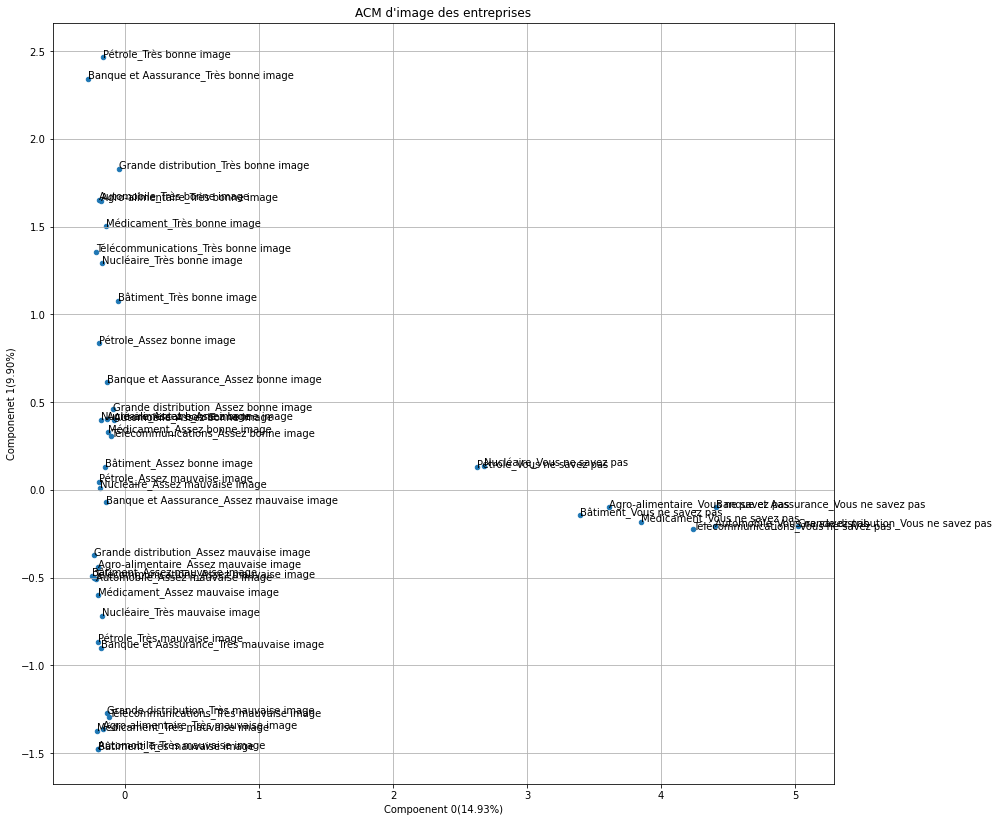

In [203]:
#ACM Items Q32L

#create scatter plot 
plt.rcParams['figure.figsize'] = [14, 14]
x= acm_vQ32L['Compoenent 0(14.93%)']
y= acm_vQ32L['Componenet 1(9.90%)']
ax = acm_vQ32L.plot(kind='scatter', x='Compoenent 0(14.93%)', y='Componenet 1(9.90%)')
plt.grid()

#label each point in scatter plot
annotations = acm_vQ32L['Variable'] 
for i, label in enumerate(annotations):
    plt.text(x[i], y[i],label)

plt.title("ACM d'image des entreprises")    